#Data Discovery

In [ ]:
# Import libraries
import pandas as pd
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score 
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, precision_score, recall_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import LeaveOneOut

In [ ]:
# Load the Pima Indians dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
feature_names = names[:8]
data = pd.read_csv(url, names=names)

In [ ]:
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data[:5]

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
def show_num_inst(data):
  # Compter le nombre d'instances pour chaque classe
  class_counts = data['class'].value_counts()

  # Définir les étiquettes et les valeurs pour le graph
  labels = class_counts.index
  values = class_counts.values

  # Configurer et afficher le graph
  plt.bar(labels, values)
  plt.xlabel('Class')
  plt.ylabel('Count')
  plt.title('Number of Instances per Class')
  plt.show()

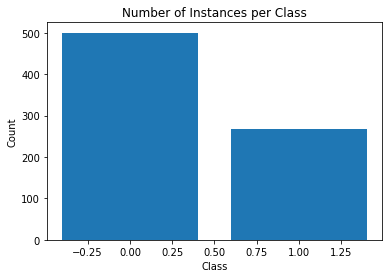

In [ ]:
show_num_inst(data)

In [ ]:
#Splitting the data into dependent and independent variables
X = data.drop("class", axis=1)
Y = data["class"]

In [ ]:
#Question 1 : Afficher les attributs et la variable cible
print("Les attributs sont : ",X.columns,"\n Affichage des 5 premières lignes\n", X.head())
print("La variable cible est : ",Y.name,"\n Affichage des 5 premières lignes\n", Y.head())

Les attributs sont :  Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object') 
 Affichage des 5 premières lignes
    preg  plas  pres  skin  test  mass   pedi  age
0     6   148    72    35     0  33.6  0.627   50
1     1    85    66    29     0  26.6  0.351   31
2     8   183    64     0     0  23.3  0.672   32
3     1    89    66    23    94  28.1  0.167   21
4     0   137    40    35   168  43.1  2.288   33
La variable cible est :  class 
 Affichage des 5 premières lignes
 0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64


In [ ]:
def plot_input(X,Y,title=""):
  # Convert the data from numpy array to a pandas dataframe
  df_ros = pd.DataFrame({'Age': X["age"], 'Blood_Pression': X["pres"], 'target': Y})
  # Plot the chart
  plt.figure(figsize=(12, 8))
  sns.scatterplot(x = 'Age', y = 'Blood_Pression', hue = 'target', data = df_ros)
  plt.title(title)

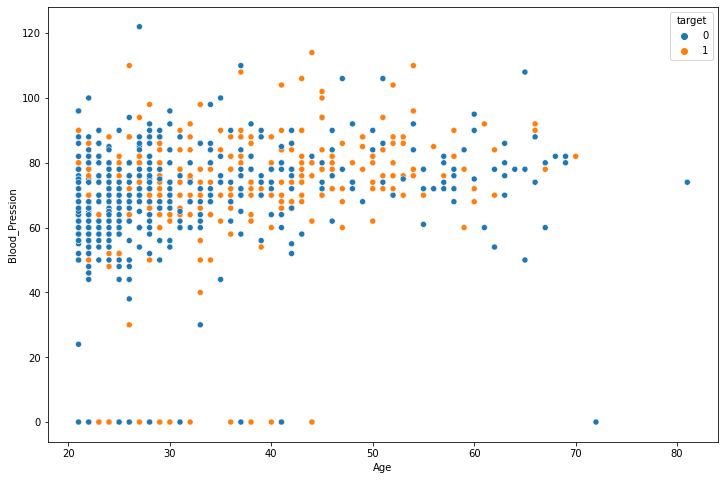

In [ ]:
plot_input(X,Y)

In [ ]:
#Question 2 : Afficher le graphe précedent en utilisant des attributs différents
def plot_input(X,Y,title=""):
  # Convert the data from numpy array to a pandas dataframe
  df_ros = pd.DataFrame({'Mass': X["mass"], 'Plasma': X["plas"], 'target': Y})
  # Plot the chart
  plt.figure(figsize=(12, 8))
  sns.scatterplot(x = 'Mass', y = 'Plasma', hue = 'target', data = df_ros)
  plt.title(title)

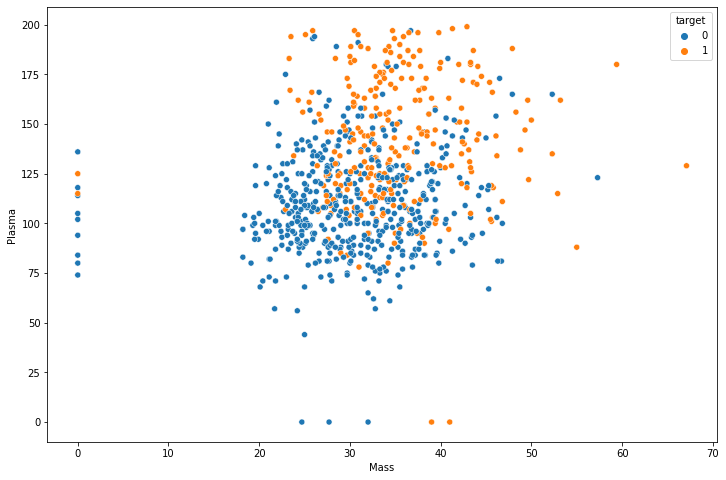

In [ ]:
plot_input(X,Y)

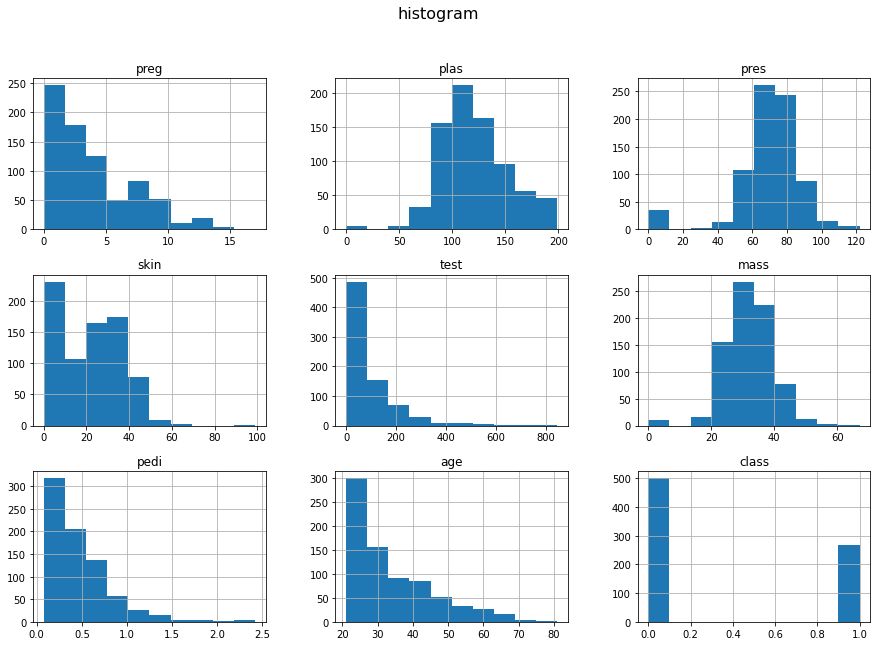

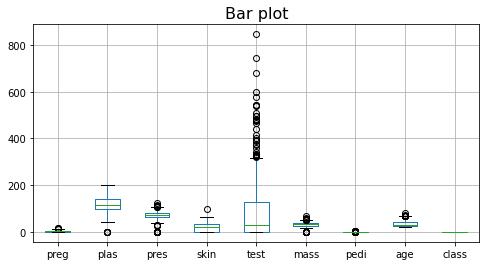

In [ ]:
#histogramms 
data.hist(figsize=(15,10))
plt.suptitle("histogram", fontsize=16)
plt.show()
#boxplot
data.boxplot(figsize=(8,4))
plt.title("Bar plot", fontsize=16)
plt.show()

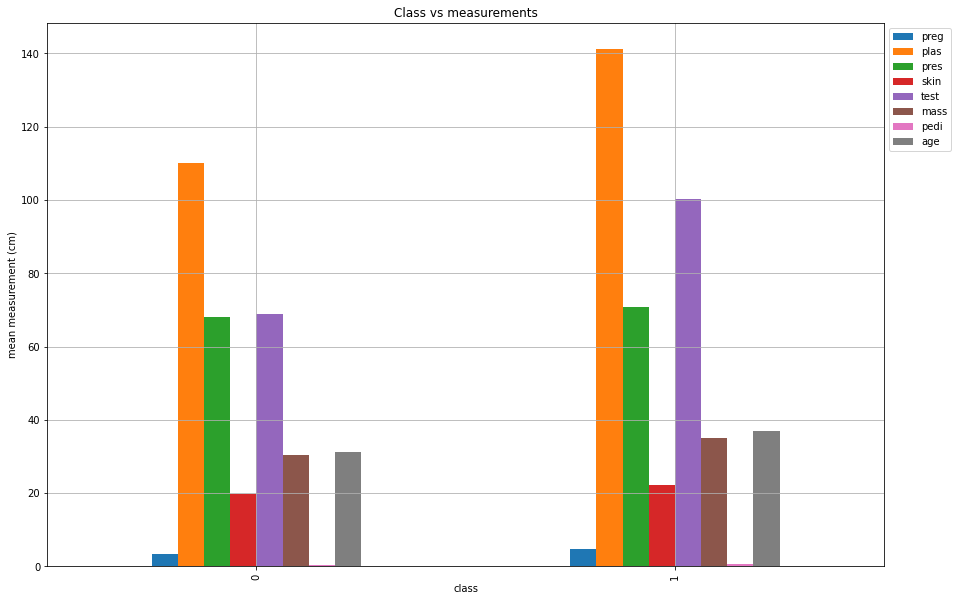

In [ ]:
data.groupby(by = "class").mean()
data.groupby(by="class").mean().plot(kind="bar", figsize=(15,10))
plt.title('Class vs measurements')
plt.ylabel('mean measurement (cm)')
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
#check transformations
print(X[0:5,:])

#Save new dataset
df = pd.DataFrame(X, columns = feature_names)
X = pd.DataFrame(X,  columns = feature_names)
df["class"]=Y

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


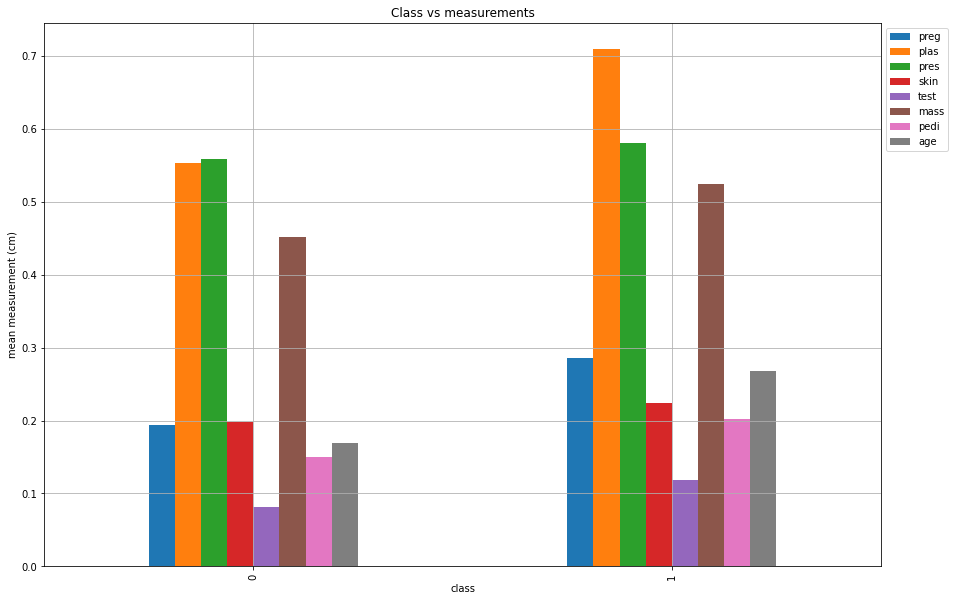

In [ ]:
#Question 3 : Afficher le graphe de la Figure 5 et 6 après la normalisation
df.groupby(by = "class").mean()
df.groupby(by="class").mean().plot(kind="bar", figsize=(15,10))
plt.title('Class vs measurements')
plt.ylabel('mean measurement (cm)')
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

# Equilibrage de la dataset






In [ ]:
from imblearn.under_sampling import RandomUnderSampler
y = df["class"]
rus = RandomUnderSampler()
X1, y1 = rus.fit_resample(X, Y)

In [ ]:
X1

,preg,plas,pres,skin,test,mass,pedi,age
0,0.176471,0.633166,0.721311,0.414141,0.277778,0.585693,0.267293,0.100000
1,0.058824,0.703518,0.606557,0.262626,0.212766,0.359165,0.320239,0.033333
2,0.294118,0.366834,0.491803,0.000000,0.000000,0.399404,0.081127,0.100000
3,0.705882,0.608040,0.639344,0.171717,0.000000,0.394933,0.077284,0.683333
4,0.000000,0.733668,0.672131,0.000000,0.000000,0.603577,0.727156,0.383333
...,...,...,...,...,...,...,...,...
531,0.058824,0.643216,0.721311,0.393939,0.130024,0.543964,0.418019,0.266667
532,0.000000,0.618090,0.590164,0.000000,0.000000,0.540984,0.076857,0.516667
533,0.352941,0.954774,0.754098,0.000000,0.000000,0.529061,0.085397,0.750000
534,0.529412,0.854271,0.606557,0.313131,0.000000,0.655738,0.138770,0.366667


In [ ]:
data1 = pd.DataFrame(X1)
data1["class"] = y1

In [ ]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler()
X2, y2 = rus.fit_resample(X, Y)
data2 = pd.DataFrame(X2)
data2["class"] = y2

In [ ]:
from  imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=3)
X3, y3 = oversample.fit_resample(X, Y)
data3 = pd.DataFrame(X3)
data3["class"] = y3

In [ ]:
def show_num_inst(data1, data2, data3):
    # Count the number of instances for each class
    class_counts1 = data1['class'].value_counts()
    class_counts2 = data2['class'].value_counts()
    class_counts3 = data3['class'].value_counts()

    # Define the labels and values for the graph
    labels = class_counts1.index
    values1 = class_counts1.values
    values2 = class_counts2.values
    values3 = class_counts3.values

    # Configure and display the graph
    width = 0.25
    x = np.arange(len(labels))
    fig, ax = plt.subplots(figsize=(8,6))
    ax.bar(x - width, values1, width, label='Undersampling')
    ax.bar(x, values2, width, label='Oversampling')
    ax.bar(x + width, values3, width, label='SMOTE')
    ax.set_xlabel('Class')
    ax.set_ylabel('Count')
    ax.set_title('Number of Instances per Class')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.show()


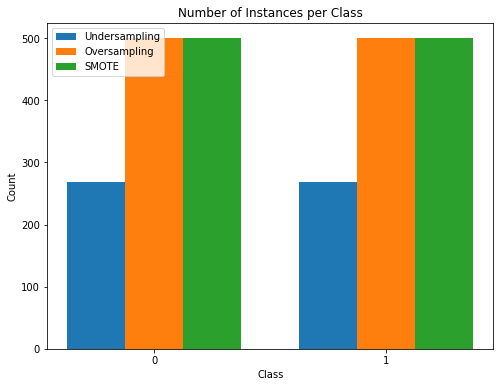

In [ ]:
show_num_inst(data1, data2, data3)

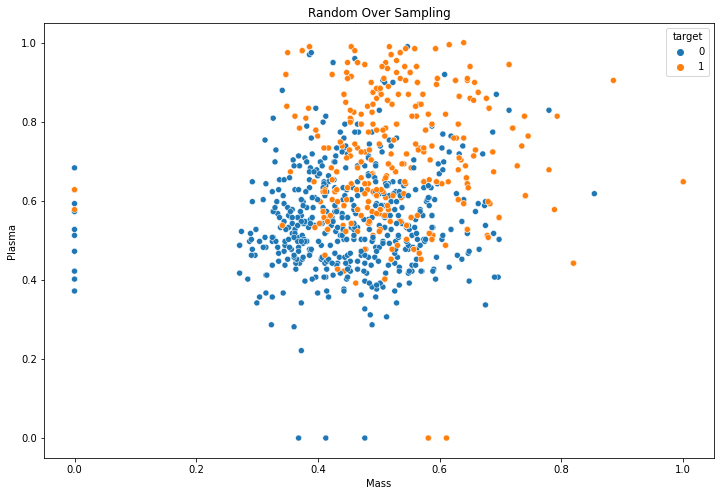

In [ ]:
plot_input(X2,y2,'Random Over Sampling')

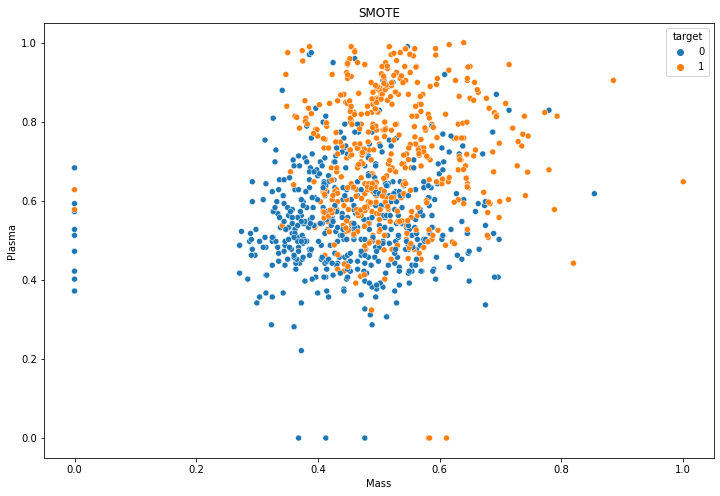

In [ ]:
plot_input(X3,y3,'SMOTE')

#Feature Extraction



In [ ]:
MI_score = mutual_info_classif(X, Y, random_state=0)
for feature in zip(feature_names, MI_score):
 print(feature)

('preg', 0.03306410669360904)
('plas', 0.12680533326286691)
('pres', 0.003267377404380545)
('skin', 0.0)
('test', 0.035542145915941736)
('mass', 0.07181993910372886)
('pedi', 0.010655570721384011)
('age', 0.04683313756038543)


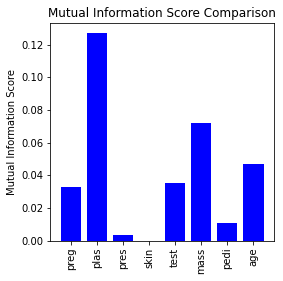

In [ ]:
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score, color='blue')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')
plt.show()

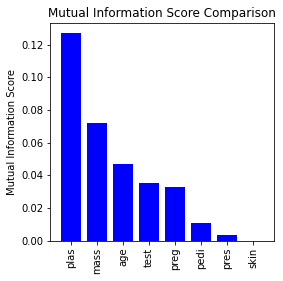

In [ ]:
import operator
zipped = zip(feature_names, MI_score)
l = sorted(zipped, key=operator.itemgetter(1))[::-1]
plt.figure(figsize=(4,4))
plt.bar(x=[element[0]for element in l], height=[element[1]for element in l], color='blue')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')
plt.show()

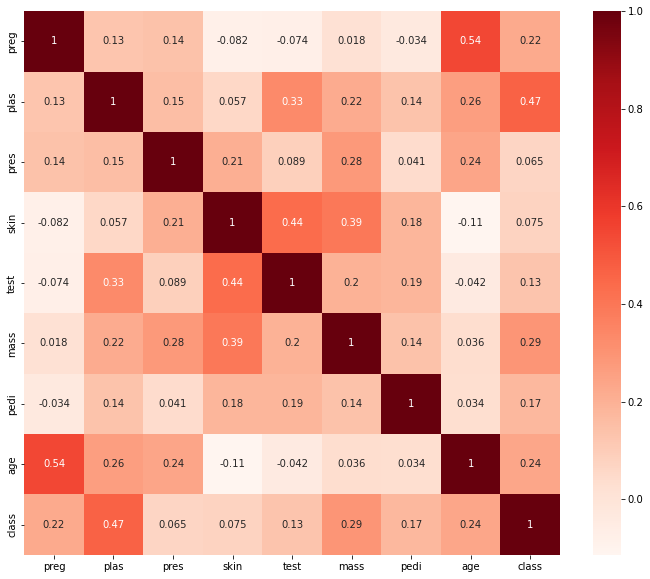

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

plas     0.466581
mass     0.292695
class    1.000000
Name: class, dtype: float64

In [ ]:
print(df[["plas","mass"]].corr())

          plas      mass
plas  1.000000  0.221071
mass  0.221071  1.000000


In [ ]:
# Use SelectKBest to select the best features based on univariate test results
selector = SelectKBest(k=2)
X_new = selector.fit_transform(X, Y)
print(X_new.shape)
print(selector.scores_)
print(selector.feature_names_in_)

(768, 2)
[ 39.67  213.162   3.257   4.304  13.281  71.772  23.871  46.141]
['preg' 'plas' 'pres' 'skin' 'test' 'mass' 'pedi' 'age']


In [ ]:
def sort_list(list1, list2):
  zipped_pairs = zip(list2, list1)
  z = [x for _, x in sorted(zipped_pairs)]
  return z
print(sort_list(selector.feature_names_in_,selector.scores_))

['pres', 'skin', 'test', 'pedi', 'preg', 'age', 'mass', 'plas']


In [ ]:
#Question 5 : SelectKBest pour un autre K, montrer que le résultat obtenu est différent des résultats avant pour k = 2
selector = SelectKBest(k=3)
X_new = selector.fit_transform(X, Y)
print(sort_list(selector.feature_names_in_,selector.scores_))

['pres', 'skin', 'test', 'pedi', 'preg', 'age', 'mass', 'plas']


In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier()

# Initialize the Sequential Feature Selector
sfs = SFS(clf, 
           k_features=4, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)

# Fit the SFS to the data
sfs = sfs.fit(X, Y,custom_feature_names=feature_names)

# Get the selected features
selected_features = list(sfs.k_feature_idx_)
print("Selected features:", selected_features)
print(sfs.subsets_)
selected_feature_names = list(sfs.k_feature_names_)
print("Selected feature names:", selected_feature_names)

Selected features: [0, 1, 5, 7]
{1: {'feature_idx': (1,), 'cv_scores': array([0.721, 0.682, 0.74 , 0.732, 0.739]), 'avg_score': 0.7226890756302521, 'feature_names': ('plas',)}, 2: {'feature_idx': (1, 5), 'cv_scores': array([0.74 , 0.708, 0.753, 0.752, 0.706]), 'avg_score': 0.7317630082335965, 'feature_names': ('plas', 'mass')}, 3: {'feature_idx': (0, 1, 5), 'cv_scores': array([0.734, 0.695, 0.773, 0.791, 0.725]), 'avg_score': 0.7435277141159494, 'feature_names': ('preg', 'plas', 'mass')}, 4: {'feature_idx': (0, 1, 5, 7), 'cv_scores': array([0.74 , 0.734, 0.753, 0.81 , 0.745]), 'avg_score': 0.7565656565656566, 'feature_names': ('preg', 'plas', 'mass', 'age')}}
Selected feature names: ['preg', 'plas', 'mass', 'age']


In [ ]:
#Question 6 : Appliquer SFS pour un nombre différent de features.
# Initialize the Random Forest Classifier
clf = RandomForestClassifier()

# Initialize the Sequential Feature Selector
sfs = SFS(clf, 
           k_features=2, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)

# Fit the SFS to the data
sfs = sfs.fit(X, Y,custom_feature_names=feature_names)

# Get the selected features
selected_features = list(sfs.k_feature_idx_)
print("Selected features:", selected_features)
print(sfs.subsets_)
selected_feature_names = list(sfs.k_feature_names_)
print("Selected feature names:", selected_feature_names)


Selected features: [1, 5]
{1: {'feature_idx': (1,), 'cv_scores': array([0.682, 0.675, 0.688, 0.745, 0.771]), 'avg_score': 0.7123588829471182, 'feature_names': ('plas',)}, 2: {'feature_idx': (1, 5), 'cv_scores': array([0.734, 0.708, 0.74 , 0.758, 0.699]), 'avg_score': 0.7278669043374926, 'feature_names': ('plas', 'mass')}}
Selected feature names: ['plas', 'mass']


In [ ]:
knn = KNeighborsClassifier()
efs = EFS(estimator=knn, # The Ml model
 min_features=1, 
 max_features=8, 
 scoring='accuracy', # The metric to use to evaluate the classifier is accuracy 
 cv=5) 
efs = efs.fit(X, Y)
print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ shows the best score 
print('Best subset (corresponding names):', efs.best_feature_names_) 
# best_feature_names_ shows the feature names that yield the best score

Features: 255/255

Best accuracy score: 0.76
Best subset (corresponding names): ('plas', 'pres', 'test', 'mass', 'pedi', 'age')


In [ ]:
# Transform the dataset
X_new = efs.transform(X)
# Print the results
print('Number of features before transformation: {}'.format(X.shape[1]))
print('Number of features after transformation: {}'.format(X_new.shape[1]))


Number of features before transformation: 8
Number of features after transformation: 6


In [ ]:
# Show the performance of each subset of features
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=True, inplace=True)
efs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(4,)","[0.6883116883116883, 0.564935064935065, 0.5389...",0.562363,"(test,)",0.085805,0.066759,0.03338
2,"(2,)","[0.6168831168831169, 0.5714285714285714, 0.545...",0.565054,"(pres,)",0.036573,0.028455,0.014227
3,"(3,)","[0.512987012987013, 0.551948051948052, 0.61038...",0.584738,"(skin,)",0.057522,0.044754,0.022377
24,"(2, 6)","[0.5844155844155844, 0.6168831168831169, 0.538...",0.592496,"(pres, pedi)",0.038177,0.029703,0.014851
6,"(6,)","[0.5584415584415584, 0.6298701298701299, 0.545...",0.595119,"(pedi,)",0.052951,0.041198,0.020599
...,...,...,...,...,...,...,...
247,"(0, 1, 2, 3, 4, 5, 7)","[0.7727272727272727, 0.7272727272727273, 0.740...",0.753934,"(preg, plas, pres, skin, test, mass, age)",0.03881,0.030195,0.015098
179,"(0, 1, 4, 5, 7)","[0.7792207792207793, 0.7012987012987013, 0.727...",0.753977,"(preg, plas, test, mass, age)",0.049181,0.038265,0.019132
225,"(0, 1, 2, 4, 5, 7)","[0.7922077922077922, 0.7077922077922078, 0.727...",0.755258,"(preg, plas, pres, test, mass, age)",0.045221,0.035183,0.017592
204,"(1, 2, 4, 5, 7)","[0.7597402597402597, 0.6493506493506493, 0.766...",0.756634,"(plas, pres, test, mass, age)",0.07309,0.056867,0.028433


In [ ]:
#Question 7 : Appliquer EFS pour un nombre différent de features.
knn = KNeighborsClassifier()
efs = EFS(estimator=knn, # The Ml model
 min_features=1, 
 max_features=5, 
 scoring='accuracy', # The metric to use to evaluate the classifier is accuracy 
 cv=5) 
efs = efs.fit(X, Y)
print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ shows the best score 
print('Best subset (corresponding names):', efs.best_feature_names_) 
# best_feature_names_ shows the feature names that yield the best score

Features: 218/218

Best accuracy score: 0.76
Best subset (corresponding names): ('plas', 'pres', 'test', 'mass', 'age')


#Classification

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

##KNN

In [ ]:
clf =  KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.6948051948051948


In [ ]:
#Question 8 : Appliquer KNN avec un n_neighbors différent.
clf =  KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.6688311688311688


In [ ]:
#2 fold
model= KNeighborsClassifier(n_neighbors=3)
y_test_model = model.fit(X_train,y_train).predict(X_test)
y_train_model=model.fit(X_test,y_test).predict(X_train) 
accuracy_score(y_train,y_train_model), accuracy_score(y_test, y_test_model)

(0.7035830618892508, 0.6948051948051948)

In [ ]:
cross_val_score(clf, X, Y, cv=5)

array([0.76 , 0.74 , 0.714, 0.817, 0.739])

In [ ]:
#lOOCV
scores = cross_val_score(model, X, Y, cv =LeaveOneOut() ) 
scores.mean()
print(scores) 
print(scores.mean())

[1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0.

In [ ]:
# Define the different feature selection filters
filters = [
    ("f_classif", f_classif),
    ("mutual_info_classif", mutual_info_classif),
    ("chi2", chi2)
]

# Evaluate the performance of each feature selection filter
for name, filter_func in filters:
    print("Evaluating filter:", name)
    k_best = SelectKBest(filter_func, k=4)
    X_train_fs = k_best.fit_transform(X_train, y_train)
    X_test_fs = k_best.transform(X_test)

    # Train a Random Forest classifier
    model = KNeighborsClassifier()
    model.fit(X_train_fs, y_train)

    # Predict the target variables of test set
    y_pred = model.predict(X_test_fs)

    # Evaluate accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print("---" * 20)

Evaluating filter: f_classif
Accuracy: 75.97%
------------------------------------------------------------
Evaluating filter: mutual_info_classif
Accuracy: 73.38%
------------------------------------------------------------
Evaluating filter: chi2
Accuracy: 75.32%
------------------------------------------------------------


In [ ]:
model2 = KNeighborsClassifier()
y_pred=model2.fit(X_train,y_train).predict(X_test)
y_test_model=model2.predict(X_test)
cm1= confusion_matrix(y_test, y_test_model)
print("Confusion Matrix: \n", cm1)
print(accuracy_score(y_test, y_test_model))
print(precision_score(y_test, y_test_model, average='weighted'))
print(recall_score(y_test, y_test_model, average='macro'))
print("Accuracy:", accuracy_score(y_test, y_test_model))
print("Confusion matrix:", confusion_matrix(y_test, y_test_model))
print("Classification report :", classification_report(y_test, y_test_model))


Confusion Matrix: 
 [[78 21]
 [27 28]]
0.6883116883116883
0.6816326530612246
0.6484848484848484
Accuracy: 0.6883116883116883
Confusion matrix: [[78 21]
 [27 28]]
Classification report :               precision    recall  f1-score   support

           0       0.74      0.79      0.76        99
           1       0.57      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.68      0.69      0.68       154



In [ ]:
#Grid search  
Knn2 = KNeighborsClassifier() 
grid_param={'n_neighbors': range(1,31),
 'weights' : ['uniform', 'distance'], 
 'metric' : ['euclidean', 'manhattan', 'minkowski']} 
grid = GridSearchCV(Knn2, grid_param, cv = 10, scoring = 'accuracy')
grid.fit(X,Y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7681989063568011
{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsClassifier(metric='euclidean', n_neighbors=15, weights='distance')


In [ ]:
#Question 9 : Appliquer le grid search sur KNN avec une dataset où les meilleurs attributs sont selectionnés.
"""EDIT here"""
#Grid search  
Knn2 = KNeighborsClassifier() 
grid_param={'n_neighbors': range(1,31),
 'weights' : ['uniform', 'distance'], 
 'metric' : ['euclidean', 'manhattan', 'minkowski']} 
grid = GridSearchCV(Knn2, grid_param, cv = 10, scoring = 'accuracy')
grid.fit(X[['plas', 'pres', 'test', 'mass', 'age']],Y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7735304169514696
{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
KNeighborsClassifier(metric='manhattan', n_neighbors=15)


## Decision Tree

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
acc2 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", acc2)

Accuracy: 0.7402597402597403


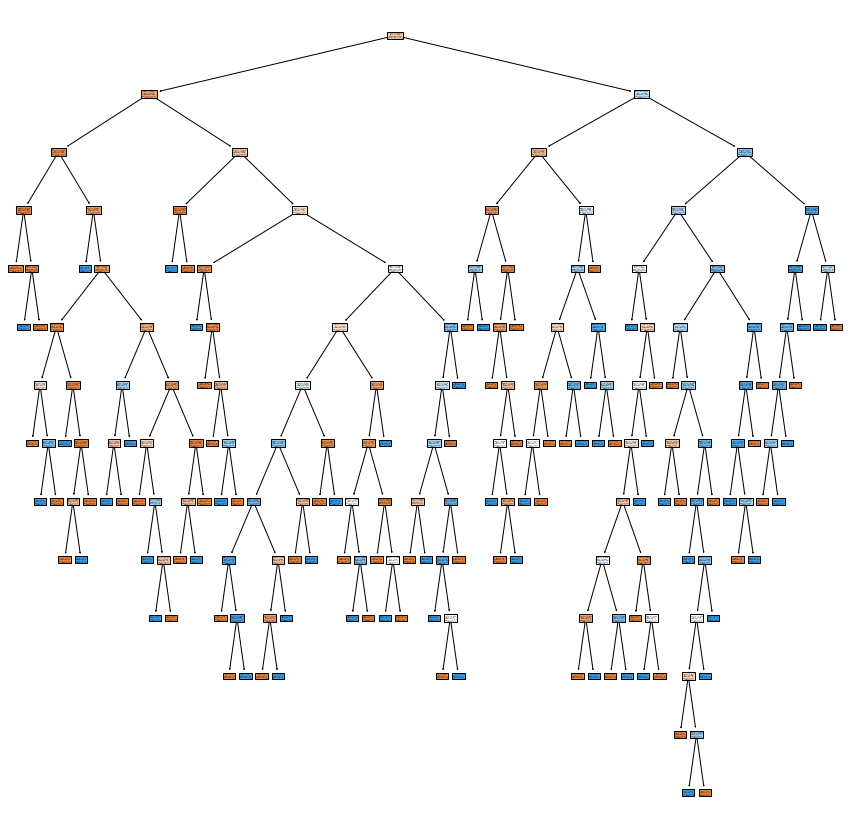

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf,
 feature_names=feature_names,
 class_names=["0","1"],
 filled=True)

In [ ]:
#Grid search 
DT = tree.DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
grid = GridSearchCV(DT, params, cv = 10, scoring = 'accuracy')
grid.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)


0.7422077922077922
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=2)


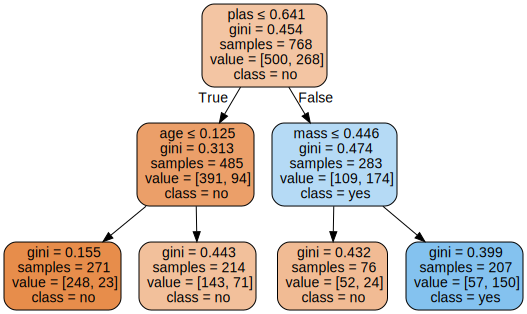

In [ ]:
dot_data = tree.export_graphviz(grid.best_estimator_, out_file=None, 
feature_names=feature_names, class_names=['no','yes'], 
 filled=True, rounded=True, 
 special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
# Use a pruning algorithm to prune the decision tree
clf = tree.DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Evaluate the pruned decision tree using the testing data
acc_scores = []
for clf in clfs:
    y_pred = clf.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    acc_scores.append(acc_score)

# Find the best pruning parameter based on accuracy score
best_clf = clfs[acc_scores.index(max(acc_scores))]

# Evaluate the best pruned decision tree using the testing data
y_pred = best_clf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy score: {:.2f}".format(acc_score))
print("ccp_alpha: {:.3f}".format(ccp_alphas[acc_scores.index(max(acc_scores))]))

Accuracy score: 0.80
ccp_alpha: 0.003


In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

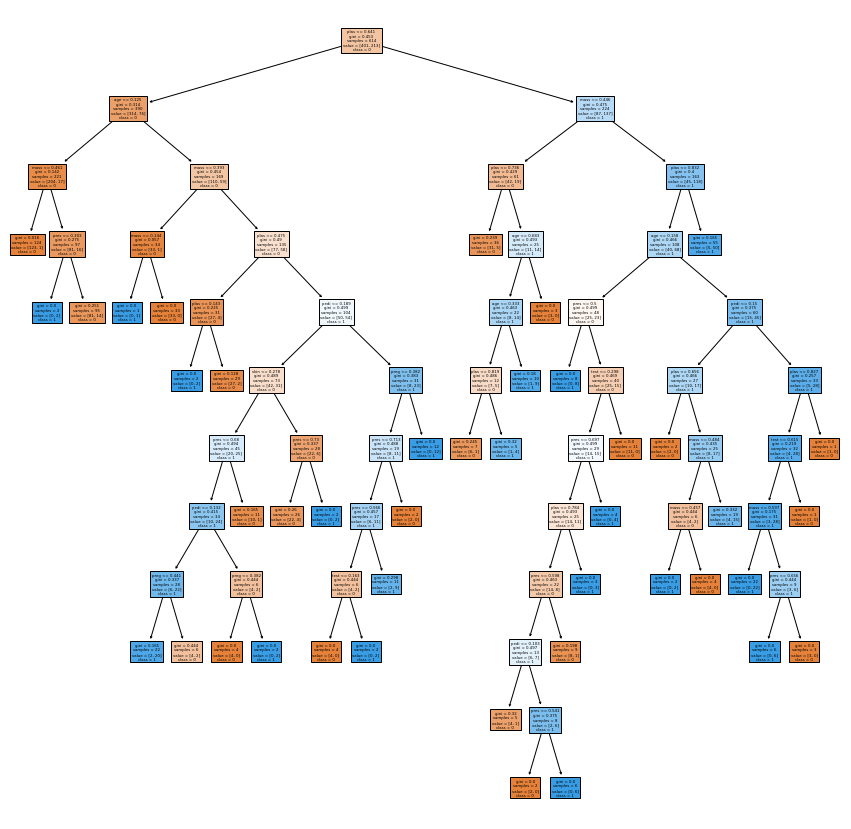

In [ ]:
#Question 9 : Afficher le meilleur arbre obtenu avec la méthode de Pruning 
"""EDIT here"""
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(best_clf,
 feature_names=feature_names,
 class_names=["0","1"],
 filled=True)

##SVM

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.7467532467532467

In [ ]:
#Question 10: Modifier le type de kernel pour SVM, on crée trois modèles qui ont comme kernel : « linear », « poly » et « rbf ». 
"""EDIT here"""
svm1 = SVC(kernel='linear')
print(svm1.fit(X_train, y_train), "\t", svm1.score(X_test, y_test),"\n\n")

svm2 = SVC(kernel='poly')
print(svm2.fit(X_train, y_train), "\t", svm2.score(X_test, y_test),"\n\n")

svm3 = SVC(kernel='rbf')
print(svm3.fit(X_train, y_train), "\t", svm3.score(X_test, y_test),"\n\n")

SVC(kernel='linear') 	 0.7597402597402597 


SVC(kernel='poly') 	 0.7792207792207793 


SVC() 	 0.7467532467532467 




In [ ]:
parametres = {"kernel":['linear','poly','rbf'],"C":[0.1,0.5,1.0,2.0]}
#classifieur à utiliser
svmc = SVC()
#instanciation de la recherche
grille = GridSearchCV(estimator=svmc,param_grid=parametres,scoring="accuracy")
#lancer l'exploration
resultats = grille.fit(X_train,y_train)
print(resultats.best_params_)
print(resultats.best_score_)

{'C': 2.0, 'kernel': 'linear'}
0.7687325069972012


In [ ]:
#Question 11 : Appliquer le grid search sur SVM avec une dataset où les meilleurs attributs sont selectionnés.
"""EDIT here"""
#Grid search 
parametres = {"kernel":['linear','poly','rbf'],"C":[0.1,0.5,1.0,2.0]}
#classifieur à utiliser
svmc = SVC()
#instanciation de la recherche
grille = GridSearchCV(estimator=svmc,param_grid=parametres,scoring="accuracy")
#lancer l'exploration
resultats = grille.fit(X_train[['plas', 'pres', 'test', 'mass', 'age']],y_train)
print(resultats.best_params_)
print(resultats.best_score_)

{'C': 2.0, 'kernel': 'poly'}
0.7736238837798214


#Comparer KNN avec SVM et DT


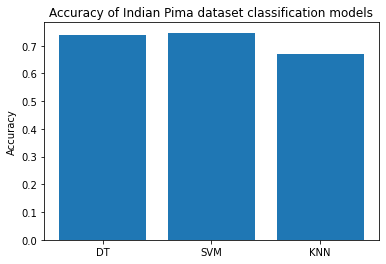

In [ ]:
# Afficher les performances des modèles
labels = ['DT', 'SVM', 'KNN']
accs = [acc2, svm.score(X_test, y_test), acc]
plt.bar(labels, accs)
plt.title('Accuracy of Indian Pima dataset classification models')
plt.ylabel('Accuracy')
plt.show()

## Splitting the data 

# Feature Selection

In [ ]:
import operator
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

def MI_feature_selection(X, Y, feature_names, plot=False):
    MI_score = mutual_info_classif(X, Y, random_state=0)
    features = list(zip(feature_names, MI_score))
    sorted_features = sorted(features, key=operator.itemgetter(1))[::-1]
    
    plt.figure(figsize=(4,4))
    plt.bar(x=[element[0] for element in sorted_features], height=[element[1] for element in sorted_features], color='blue')
    plt.xticks(rotation='vertical')
    plt.ylabel('Mutual Information Score')
    plt.title('Mutual Information Score Comparison')
    plt.show()

    selected_features_20 = [f[0] for f in sorted_features[:int(len(sorted_features)*0.2)]]
    selected_features_40 = [f[0] for f in sorted_features[:int(len(sorted_features)*0.4)]]
    selected_features_60 = [f[0] for f in sorted_features[:int(len(sorted_features)*0.6)]]

    return selected_features_20, selected_features_40, selected_features_60

def correlation_feature_selection(df, target, threshold=0):
    # Calculate correlation matrix
    cor = df.corr()

    # Plot heatmap with annotations

    plt.figure(figsize=(12,10))
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

    # Correlation with output variable
    cor_target = abs(cor[target])

    # Select highly correlated features
    relevant_features = cor_target[cor_target > threshold]

    # Sort relevant features by correlation coefficient
    sorted_features = relevant_features.sort_values(ascending=False)
    sorted_features = sorted_features.drop(target)

    # Calculate number of features to select at each step
    n = len(sorted_features)
    k20 = int(n * 0.2)
    k40 = int(n * 0.4)
    k60 = int(n * 0.6)

    # Select top 20%, 40%, and 60% of relevant features
    top_20_percent = sorted_features[:k20]
    top_40_percent = sorted_features[:k40]
    top_60_percent = sorted_features[:k60]

    return sorted_features, top_20_percent, top_40_percent, top_60_percent



def k_best_feature_selection(X, Y, feature_names, k):
    selector = SelectKBest(k=k)
    X_new = selector.fit_transform(X, Y)

    print(selector.scores_)
    print(selector.feature_names_in_)
    sorted_features = sort_list(selector.feature_names_in_, selector.scores_)
    print(sorted_features)

    n = len(sorted_features)
    k20 = int(n * 0.2)
    k40 = int(n * 0.4)
    k60 = int(n * 0.6)

    # Select top 20%, 40%, and 60% of relevant features
    top_20_percent = sorted_features[:k20]
    top_40_percent = sorted_features[:k40]
    top_60_percent = sorted_features[:k60]

    return top_20_percent, top_40_percent, top_60_percent

def sequential_feature_selection(X, Y, feature_names, k):
    clf = RandomForestClassifier()
    sfs = SFS(clf, k_features=k, forward=True, floating=False, scoring='accuracy', cv=5)
    sfs = sfs.fit(X, Y, custom_feature_names=feature_names if len(feature_names) == X.shape[1] else None)
    selected_features = list(sfs.k_feature_idx_)
    selected_feature_names = list(sfs.k_feature_names_)

    n_features = len(selected_feature_names)
    selected_feature_names_20pct = selected_feature_names[:int(n_features*0.2)]
    selected_feature_names_40pct = selected_feature_names[:int(n_features*0.4)]
    selected_feature_names_60pct = selected_feature_names[:int(n_features*0.6)]

    #print("Selected features:", selected_features)
    #print(sfs.subsets_)
    #print("Selected feature names:", selected_feature_names)

    return selected_feature_names, selected_feature_names_20pct, selected_feature_names_40pct, selected_feature_names_60pct





def exhaustive_feature_selection(X, Y, feature_names):
    knn = KNeighborsClassifier()
    efs = EFS(estimator=knn, # The Ml model
    min_features=6, 
    max_features=8, 
    scoring='accuracy', # The metric to use to evaluate the classifier is accuracy 
    cv=5) 
    efs = efs.fit(X, Y)
    #print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ shows the best score 
    #print('Best subset (corresponding names):', efs.best_feature_names_) 

    selected_feature_names = list(efs.best_feature_names_)
    n_features = len(selected_feature_names)
    selected_feature_names_20pct = selected_feature_names[:int(n_features*0.2)]
    selected_feature_names_40pct = selected_feature_names[:int(n_features*0.4)]
    selected_feature_names_60pct = selected_feature_names[:int(n_features*0.6)]

    return selected_feature_names, selected_feature_names_20pct, selected_feature_names_40pct, selected_feature_names_60pct


## Random under sampling

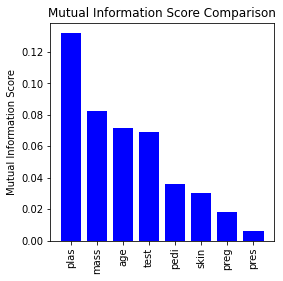

Top 20% of features: ['plas'] 


Top 40% of features: ['plas', 'mass', 'age'] 


Top 60% of features: ['plas', 'mass', 'age', 'test'] 




In [ ]:
F20, F40, F60 = MI_feature_selection(X1, y1, feature_names)
print('Top 20% of features:', F20,"\n\n")
print('Top 40% of features:', F40,"\n\n")
print('Top 60% of features:', F60,"\n\n")
X_RUS_IG_20 = X1[F20]
X_RUS_IG_40 = X1[F40]
X_RUS_IG_60 = X1[F60]

,class,plas,mass,age,preg
0,0,0.562814,0.532042,0.000000,0.117647
1,0,0.582915,0.381520,0.150000,0.294118
2,0,0.412060,0.424739,0.066667,0.117647
3,0,0.457286,0.530551,0.783333,0.470588
4,0,0.391960,0.502235,0.066667,0.294118
...,...,...,...,...,...
531,1,0.643216,0.543964,0.266667,0.058824
532,1,0.618090,0.540984,0.516667,0.000000
533,1,0.954774,0.529061,0.750000,0.352941
534,1,0.854271,0.655738,0.366667,0.529412


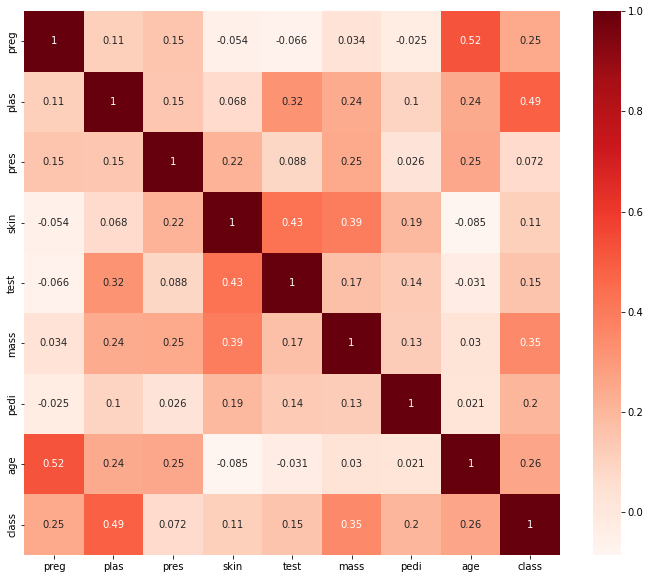

Top 20% of features: plas    0.48633
Name: class, dtype: float64 


Top 40% of features: plas    0.486330
mass    0.351006
age     0.262342
Name: class, dtype: float64 


Top 60% of features: plas    0.486330
mass    0.351006
age     0.262342
preg    0.246400
Name: class, dtype: float64 


Top 100% of features: plas    0.486330
mass    0.351006
age     0.262342
preg    0.246400
pedi    0.203699
test    0.152860
skin    0.111900
pres    0.071980
Name: class, dtype: float64


In [ ]:
relevant_features = correlation_feature_selection(data1, "class")


F, top_20_percent, top_40_percent, top_60_percent = relevant_features


print('Top 20% of features:', top_20_percent,"\n\n")
print('Top 40% of features:', top_40_percent,"\n\n")
print('Top 60% of features:', top_60_percent,"\n\n")
print('Top 100% of features:', F)

X_RUS_PC_20 = X1[top_20_percent.index]
X_RUS_PC_40 = X1[top_40_percent.index]
X_RUS_PC_60 = X1[top_60_percent.index]

In [ ]:

top_20_percent, top_40_percent, top_60_percent = k_best_feature_selection(X1, y1, feature_names, 3)


print('Top 20% of features:', top_20_percent,"\n\n")
print('Top 40% of features:', top_40_percent,"\n\n")
print('Top 60% of features:', top_60_percent,"\n\n")


X_RUS_Kb_20 = X1[top_20_percent]
X_RUS_Kb_40 = X1[top_40_percent]
X_RUS_Kb_60 = X1[top_60_percent]

[ 31.957 172.404   4.093   6.522  16.492  61.88   19.621  34.183     inf]
['preg' 'plas' 'pres' 'skin' 'test' 'mass' 'pedi' 'age' 'class']
['pres', 'skin', 'test', 'pedi', 'preg', 'age', 'mass', 'plas', 'class']
Top 20% of features: ['pres'] 


Top 40% of features: ['pres', 'skin', 'test'] 


Top 60% of features: ['pres', 'skin', 'test', 'pedi', 'preg'] 




/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [ ]:
F, top_20_percent, top_40_percent, top_60_percent = sequential_feature_selection(X1, y1, feature_names, 6)


print('Top 20% of features:', top_20_percent,"\n\n")
print('Top 40% of features:', top_40_percent,"\n\n")
print('Top 60% of features:', top_60_percent,"\n\n")


X_RUS_SFS_20 = X1[top_20_percent]
X_RUS_SFS_40 = X1[top_40_percent]
X_RUS_SFS_60 = X1[top_60_percent]

sequential_feature_selection(X1, y1, feature_names, 6)

Top 20% of features: ['preg'] 


Top 40% of features: ['preg', 'plas'] 


Top 60% of features: ['preg', 'plas', 'pres'] 




(['preg', 'plas', 'pres', 'skin', 'test', 'class'],
 ['preg'],
 ['preg', 'plas'],
 ['preg', 'plas', 'pres'])

In [ ]:


F, top_20_percent, top_40_percent, top_60_percent = exhaustive_feature_selection(X1, y1, feature_names)


print('Top 20% of features:', top_20_percent,"\n\n")
print('Top 40% of features:', top_40_percent,"\n\n")
print('Top 60% of features:', top_60_percent,"\n\n")
print("\n\n\n", F)


X_RUS_EFS_20 = X1[top_20_percent]
X_RUS_EFS_40 = X1[top_40_percent]
X_RUS_EFS_60 = X1[top_60_percent]

Features: 129/129

Top 20% of features: ['preg'] 


Top 40% of features: ['preg', 'plas'] 


Top 60% of features: ['preg', 'plas', 'pres'] 





 ['preg', 'plas', 'pres', 'skin', 'test', 'class']


## Random over-sampling

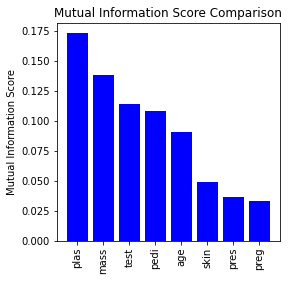

Top 20% of features: ['plas'] 


Top 40% of features: ['plas', 'mass', 'test'] 


Top 60% of features: ['plas', 'mass', 'test', 'pedi'] 




In [ ]:
F20, F40, F60 = MI_feature_selection(X2, y2, feature_names)
print('Top 20% of features:', F20,"\n\n")
print('Top 40% of features:', F40,"\n\n")
print('Top 60% of features:', F60,"\n\n")
X_ROS_IG_20 = X2[F20]
X_ROS_IG_40 = X2[F40]
X_ROS_IG_60 = X2[F60]

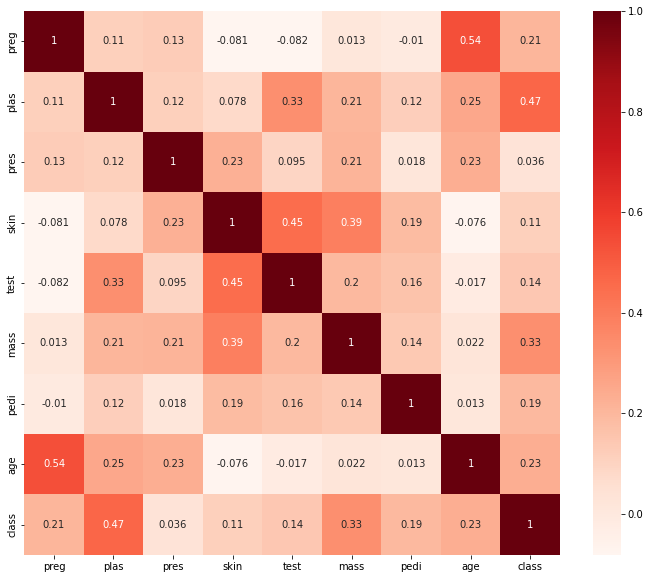

Top 20% of features: plas    0.470223
Name: class, dtype: float64 


Top 40% of features: plas    0.470223
mass    0.334124
age     0.232611
Name: class, dtype: float64 


Top 60% of features: plas    0.470223
mass    0.334124
age     0.232611
preg    0.205520
Name: class, dtype: float64 


Top 100% of features: plas    0.470223
mass    0.334124
age     0.232611
preg    0.205520
pedi    0.193495
test    0.144442
skin    0.113470
pres    0.035755
Name: class, dtype: float64


In [ ]:
relevant_features = correlation_feature_selection(data2, "class")


F, top_20_percent, top_40_percent, top_60_percent = relevant_features


print('Top 20% of features:', top_20_percent,"\n\n")
print('Top 40% of features:', top_40_percent,"\n\n")
print('Top 60% of features:', top_60_percent,"\n\n")
print('Top 100% of features:', F)

X_ROS_PC_20 = X2[top_20_percent.index]
X_ROS_PC_40 = X2[top_40_percent.index]
X_ROS_PC_60 = X2[top_60_percent.index]

In [ ]:

top_20_percent, top_40_percent, top_60_percent = k_best_feature_selection(X2, y2, feature_names, 3)


print('Top 20% of features:', top_20_percent,"\n\n")
print('Top 40% of features:', top_40_percent,"\n\n")
print('Top 60% of features:', top_60_percent,"\n\n")


X_ROS_Kb_20 = X2[top_20_percent]
X_ROS_Kb_40 = X2[top_40_percent]
X_ROS_Kb_60 = X2[top_60_percent]

[ 53.609 256.594   5.437   7.088  19.755 119.965  33.369  66.999     inf]
['preg' 'plas' 'pres' 'skin' 'test' 'mass' 'pedi' 'age' 'class']
['pres', 'skin', 'test', 'pedi', 'preg', 'age', 'mass', 'plas', 'class']
Top 20% of features: ['pres'] 


Top 40% of features: ['pres', 'skin', 'test'] 


Top 60% of features: ['pres', 'skin', 'test', 'pedi', 'preg'] 




/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [ ]:
F, top_20_percent, top_40_percent, top_60_percent = sequential_feature_selection(X2, y2, feature_names, 6)


print('Top 20% of features:', top_20_percent,"\n\n")
print('Top 40% of features:', top_40_percent,"\n\n")
print('Top 60% of features:', top_60_percent,"\n\n")


X_ROS_SFS_20 = X2[top_20_percent]
X_ROS_SFS_40 = X2[top_40_percent]
X_ROS_SFS_60 = X2[top_60_percent]


Top 20% of features: ['preg'] 


Top 40% of features: ['preg', 'plas'] 


Top 60% of features: ['preg', 'plas', 'pres'] 




In [ ]:


F, top_20_percent, top_40_percent, top_60_percent = exhaustive_feature_selection(X2, y2, feature_names)


print('Top 20% of features:', top_20_percent,"\n\n")
print('Top 40% of features:', top_40_percent,"\n\n")
print('Top 60% of features:', top_60_percent,"\n\n")


X_ROS_EFS_20 = X2[top_20_percent]
X_ROS_EFS_40 = X2[top_40_percent]
X_ROS_EFS_60 = X2[top_60_percent]

Features: 129/129

Top 20% of features: ['preg'] 


Top 40% of features: ['preg', 'plas'] 


Top 60% of features: ['preg', 'plas', 'pres'] 




## SMOTE

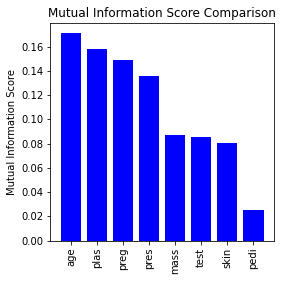

Top 20% of features: ['age'] 


Top 40% of features: ['age', 'plas', 'preg'] 


Top 60% of features: ['age', 'plas', 'preg', 'pres'] 




In [ ]:
F20, F40, F60 = MI_feature_selection(X3, y3, feature_names)
print('Top 20% of features:', F20,"\n\n")
print('Top 40% of features:', F40,"\n\n")
print('Top 60% of features:', F60,"\n\n")
X_SMOTE_IG_20 = X3[F20]
X_SMOTE_IG_40 = X3[F40]
X_SMOTE_IG_60 = X3[F60]

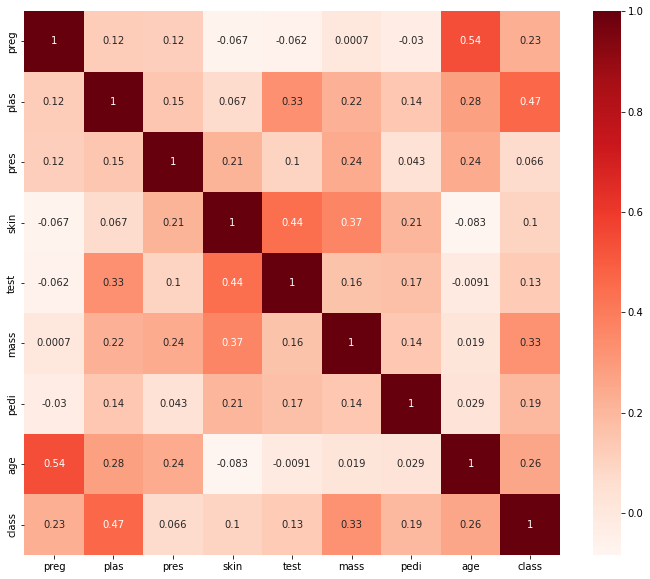

Top 20% of features: plas    0.46554
Name: class, dtype: float64 


Top 40% of features: plas    0.465540
mass    0.326882
age     0.256044
Name: class, dtype: float64 


Top 60% of features: plas    0.465540
mass    0.326882
age     0.256044
preg    0.225564
Name: class, dtype: float64 


Top 100% of features: plas    0.465540
mass    0.326882
age     0.256044
preg    0.225564
pedi    0.192818
test    0.130296
skin    0.102643
pres    0.066330
Name: class, dtype: float64


In [ ]:
relevant_features = correlation_feature_selection(data3, "class")


F, top_20_percent, top_40_percent, top_60_percent = relevant_features


print('Top 20% of features:', top_20_percent,"\n\n")
print('Top 40% of features:', top_40_percent,"\n\n")
print('Top 60% of features:', top_60_percent,"\n\n")
print('Top 100% of features:', F)

X_SMOTE_PC_20 = X3[top_20_percent.index]
X_SMOTE_PC_40 = X3[top_40_percent.index]
X_SMOTE_PC_60 = X3[top_60_percent.index]

In [ ]:

top_20_percent, top_40_percent, top_60_percent = k_best_feature_selection(X3, y3, feature_names, 3)


print('Top 20% of features:', top_20_percent,"\n\n")
print('Top 40% of features:', top_40_percent,"\n\n")
print('Top 60% of features:', top_60_percent,"\n\n")


X_SMOTE_Kb_20 = X3[top_20_percent]
X_SMOTE_Kb_40 = X3[top_40_percent]
X_SMOTE_Kb_60 = X3[top_60_percent]

[ 67.417 287.119   7.643   5.866  21.066 103.3    25.788  76.364     inf]
['preg' 'plas' 'pres' 'skin' 'test' 'mass' 'pedi' 'age' 'class']
['skin', 'pres', 'test', 'pedi', 'preg', 'age', 'mass', 'plas', 'class']
Top 20% of features: ['skin'] 


Top 40% of features: ['skin', 'pres', 'test'] 


Top 60% of features: ['skin', 'pres', 'test', 'pedi', 'preg'] 




/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [ ]:
F, top_20_percent, top_40_percent, top_60_percent = sequential_feature_selection(X3, y3, feature_names, 6)


print('Top 20% of features:', top_20_percent,"\n\n")
print('Top 40% of features:', top_40_percent,"\n\n")
print('Top 60% of features:', top_60_percent,"\n\n")


X_SMOTE_SFS_20 = X3[top_20_percent]
X_SMOTE_SFS_40 = X3[top_40_percent]
X_SMOTE_SFS_60 = X3[top_60_percent]



Top 20% of features: ['preg'] 


Top 40% of features: ['preg', 'plas'] 


Top 60% of features: ['preg', 'plas', 'pres'] 




In [ ]:


F, top_20_percent, top_40_percent, top_60_percent = exhaustive_feature_selection(X3, y3, feature_names)


print('Top 20% of features:', top_20_percent,"\n\n")
print('Top 40% of features:', top_40_percent,"\n\n")
print('Top 60% of features:', top_60_percent,"\n\n")


X_SMOTE_EFS_20 = X3[top_20_percent]
X_SMOTE_EFS_40 = X3[top_40_percent]
X_SMOTE_EFS_60 = X3[top_60_percent]

Features: 129/129

Top 20% of features: ['preg'] 


Top 40% of features: ['preg', 'plas'] 


Top 60% of features: ['preg', 'plas', 'pres'] 




# Classification

## Training and testing

## KNN by default

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.model_selection import cross_val_score

def knn_default(X, y, test_size=0.2, random_state=42, cv=5):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Train the model with default parameters
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    acc = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='weighted')
    recall = metrics.recall_score(y_test, y_pred, average='weighted')
    f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
    
    # Cross-validation
    cv_scores = cross_val_score(clf, X, y, cv=cv)
    cv_acc = cv_scores.mean()
    cv_precision = cross_val_score(clf, X, y, cv=cv, scoring='precision_weighted').mean()
    cv_recall = cross_val_score(clf, X, y, cv=cv, scoring='recall_weighted').mean()
    cv_f1_score = cross_val_score(clf, X, y, cv=cv, scoring='f1_weighted').mean()

    return acc, precision, recall, f1_score



### Random Under-sampling

In [ ]:
'''X_RUS_IG_20
X_RUS_IG_40
X_RUS_IG_60
X_RUS_PC_20
X_RUS_PC_40
X_RUS_PC_60
X_RUS_Kb_20
X_RUS_Kb_40
X_RUS_Kb_60
X_RUS_EFS_20
X_RUS_EFS_40
X_RUS_EFS_60
X_RUS_SFS_20
X_RUS_SFS_20
X_RUS_SFS_20'''

acc20, prec20, rec20, f120 = knn_default(X_RUS_IG_20, y1)
acc40, prec40, rec40, f140 = knn_default(X_RUS_IG_40, y1)
acc60, prec60, rec60, f160 = knn_default(X_RUS_IG_60, y1)

print("RUS IG 20% accuracy :", acc20, "\n")
print("RUS IG 20% recall :", prec20, "\n")
print("RUS IG 20%  precision :", rec20, "\n")
print("RUS IG 20% F1-score :", f120, "\n")
print("\n\n")
print("RUS IG 40% accuracy :", acc40, "\n")
print("RUS IG 40% recall :", prec40, "\n")
print("RUS IG 40%  precision :", rec40, "\n")
print("RUS IG 40% accuracy :", f140, "\n")
print("\n\n")
print("RUS IG 60% accuracy :", acc60, "\n")
print("RUS IG 60% recall :", prec60, "\n")
print("RUS IG 60%  precision :", rec60, "\n")
print("RUS IG 60% accuracy :", f160, "\n")



print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_default(X_RUS_EFS_20, y1)
acc40, prec40, rec40, f140 = knn_default(X_RUS_EFS_40, y1)
acc60, prec60, rec60, f160 = knn_default(X_RUS_EFS_60, y1)
print("RUS EFS 20% accuracy :", acc20, "\n")
print("RUS EFS 20% recall :", prec20, "\n")
print("RUS EFS 20% precision :", rec20, "\n")
print("RUS EFS 20% F1-score :", f120, "\n")
print("\n\n")
print("RUS EFS 40% accuracy :", acc40, "\n")
print("RUS EFS 40% recall :", prec40, "\n")
print("RUS EFS 40%  precision:", rec40, "\n")
print("RUS EFS 40% accuracy :", f140, "\n")
print("\n\n")
print("RUS EFS 60% accuracy :", acc60, "\n")
print("RUS EFS 60% recall :", prec60, "\n")
print("RUS EFS 60%  precision :", rec60, "\n")
print("RUS EFS 60% accuracy :", f160, "\n")

print("---------------------------------------------------")
print("---------------------------------------------------")


print("----------------------------------------------------")
print("---------------------------------------------------")


RUS IG 20% accuracy : 0.6851851851851852 

RUS IG 20% recall : 0.6935940068035011 

RUS IG 20%  precision : 0.6851851851851852 

RUS IG 20% accuracy : 0.6856171780700082 




RUS IG 40% accuracy : 0.7314814814814815 

RUS IG 40% recall : 0.7421136653895275 

RUS IG 40%  precision : 0.7314814814814815 

RUS IG 40% accuracy : 0.7316886894611322 




RUS IG 60% accuracy : 0.7037037037037037 

RUS IG 60% recall : 0.7122654129878072 

RUS IG 60%  precision : 0.7037037037037037 

RUS IG 60% accuracy : 0.7041102852423606 

---------------------------------------------------
RUS EFS 20% accuracy : 0.49074074074074076 

RUS EFS 20% recall : 0.4861374158249158 

RUS EFS 20% precision : 0.49074074074074076 

RUS EFS 20% accuracy : 0.48740177365931364 




RUS EFS 40% accuracy : 0.6759259259259259 

RUS EFS 40% recall : 0.6802126200274349 

RUS EFS 40%  precision: 0.6759259259259259 

RUS EFS 40% accuracy : 0.6766220211103792 




RUS EFS 60% accuracy : 0.6851851851851852 

RUS EFS 60% recall : 0.

## The rest

In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_default(X_RUS_PC_20, y1)
acc40, prec40, rec40, f140 = knn_default(X_RUS_PC_40, y1)
acc60, prec60, rec60, f160 = knn_default(X_RUS_PC_60, y1)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

0.6666666666666666  &  0.6671240708976559  &  0.6749226006191952  &  0.6666666666666666



0.7407407407407407  &  0.7407407407407407  &  0.7535518915664193  &  0.7407407407407407



0.7037037037037037  &  0.7043152543668539  &  0.7068547106282955  &  0.7037037037037037


In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_default(X_RUS_PC_20, y1)
acc40, prec40, rec40, f140 = knn_default(X_RUS_PC_40, y1)
acc60, prec60, rec60, f160 = knn_default(X_RUS_PC_60, y1)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_default(X_RUS_Kb_20, y1)
acc40, prec40, rec40, f140 = knn_default(X_RUS_Kb_40, y1)
acc60, prec60, rec60, f160 = knn_default(X_RUS_Kb_60, y1)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("Kbest")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_default(X_RUS_SFS_20, y1)
acc40, prec40, rec40, f140 = knn_default(X_RUS_SFS_40, y1)
acc60, prec60, rec60, f160 = knn_default(X_RUS_SFS_60, y1)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("SFS")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

Kbest
++++++++++++++++++++++++++++++++++++++++++++++

0.46296296296296297  &  0.4562962962962963  &  0.47618951313891245  &  0.46296296296296297



0.5648148148148148  &  0.5651506346439039  &  0.5733780332056194  &  0.5648148148148148



0.5462962962962963  &  0.5466488244266022  &  0.5470945083014048  &  0.5462962962962963
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

SFS
++++++++++++++++++++++++++++++++++++++++++++++

0.49074074074074076  &  0.48740177365931364  &  0.4861374158249158  &  0.490

### Random Over-sampling

In [ ]:
acc20, prec20, rec20, f120 = knn_default(X_ROS_IG_20, y2)
acc40, prec40, rec40, f140 = knn_default(X_ROS_IG_40, y2)
acc60, prec60, rec60, f160 = knn_default(X_ROS_IG_60, y2)
print("ROS IG 20% accuracy :", acc20, "\n")
print("ROS IG 20% recall :", prec20, "\n")
print("ROS IG 20%  precision :", rec20, "\n")
print("ROS IG 20% F1-score :", f120, "\n")
print("\n\n")
print("ROS IG 40% accuracy :", acc40, "\n")
print("ROS IG 40% recall :", prec40, "\n")
print("ROS IG 40%  precision:", rec40, "\n")
print("ROS IG 40% accuracy :", f140, "\n")
print("\n\n")
print("ROS IG 60% accuracy :", acc60, "\n")
print("ROS IG 60% recall :", prec60, "\n")
print("ROS IG 60%  precision:", rec60, "\n")
print("ROS IG 60% accuracy :", f160, "\n")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_default(X_ROS_EFS_20, y2)
acc40, prec40, rec40, f140 = knn_default(X_ROS_EFS_40, y2)
acc60, prec60, rec60, f160 = knn_default(X_ROS_EFS_60, y2)
print("ROS EFS 20% accuracy :", acc20, "\n")
print("ROS EFS 20% recall :", prec20, "\n")
print("ROS EFS 20%  precision :", rec20, "\n")
print("ROS EFS 20% F1-score :", f120, "\n")
print("\n\n")
print("ROS EFS 40% accuracy :", acc40, "\n")
print("ROS EFS 40% recall :", prec40, "\n")
print("ROS EFS 40%  precision:", rec40, "\n")
print("ROS EFS 40% accuracy :", f140, "\n")
print("\n\n")
print("ROS EFS 60% accuracy :", acc60, "\n")
print("ROS EFS 60% recall :", prec60, "\n")
print("ROS EFS 60%  precision:", rec60, "\n")
print("ROS EFS 60% accuracy :", f160, "\n")

ROS IG 20% accuracy : 0.645 

ROS IG 20% recall : 0.6458636363636364 

ROS IG 20%  precision : 0.645 

ROS IG 20% accuracy : 0.6441187090950123 




ROS IG 40% accuracy : 0.685 

ROS IG 40% recall : 0.685690418679549 

ROS IG 40%  precision: 0.685 

ROS IG 40% accuracy : 0.6845028683083244 




ROS IG 60% accuracy : 0.755 

ROS IG 60% recall : 0.7621858205870194 

ROS IG 60%  precision: 0.755 

ROS IG 60% accuracy : 0.7530036075582128 

---------------------------------------------------
ROS EFS 20% accuracy : 0.625 

ROS EFS 20% recall : 0.625 

ROS EFS 20%  precision : 0.625 

ROS EFS 20% accuracy : 0.624859287054409 




ROS EFS 40% accuracy : 0.7 

ROS EFS 40% recall : 0.7035805626598466 

ROS EFS 40%  precision: 0.7 

ROS EFS 40% accuracy : 0.6983091787439614 




ROS EFS 60% accuracy : 0.685 

ROS EFS 60% recall : 0.685690418679549 

ROS EFS 60%  precision: 0.685 

ROS EFS 60% accuracy : 0.6845028683083244 



## The rest

In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_default(X_ROS_PC_20, y2)
acc40, prec40, rec40, f140 = knn_default(X_ROS_PC_40, y2)
acc60, prec60, rec60, f160 = knn_default(X_ROS_PC_60, y2)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

0.705  &  0.701390134529148  &  0.7138493064312736  &  0.705



0.75  &  0.7466517857142857  &  0.7621951219512195  &  0.75



0.795  &  0.7946764698514491  &  0.7963103864734299  &  0.795


In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_default(X_ROS_PC_20, y2)
acc40, prec40, rec40, f140 = knn_default(X_ROS_PC_40, y2)
acc60, prec60, rec60, f160 = knn_default(X_ROS_PC_60, y2)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_default(X_ROS_Kb_20, y2)
acc40, prec40, rec40, f140 = knn_default(X_ROS_Kb_40, y2)
acc60, prec60, rec60, f160 = knn_default(X_ROS_Kb_60, y2)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("Kbest")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_default(X_ROS_SFS_20, y2)
acc40, prec40, rec40, f140 = knn_default(X_ROS_SFS_40, y2)
acc60, prec60, rec60, f160 = knn_default(X_ROS_SFS_60, y2)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("SFS")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

Kbest
++++++++++++++++++++++++++++++++++++++++++++++

0.56  &  0.5597357621859673  &  0.5599197994987469  &  0.56



0.625  &  0.6231615336266499  &  0.6266574867401061  &  0.625



0.7  &  0.6983091787439614  &  0.7035805626598466  &  0.7
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

SFS
++++++++++++++++++++++++++++++++++++++++++++++

0.625  &  0.624859287054409  &  0.625  &  0.625



0.7  &  0.6983091787439614  &  0.7035805626598466  &  0.7



0.685  &  0.6845028683083244  &  0.685690418679549 

### SMOTE

In [ ]:
acc20, prec20, rec20, f120 = knn_default(X_SMOTE_IG_20, y3)
acc40, prec40, rec40, f140 = knn_default(X_SMOTE_IG_40, y3)
acc60, prec60, rec60, f160 = knn_default(X_SMOTE_IG_60, y3)
print("SMOTE IG 20% accuracy :", acc20, "\n")
print("SMOTE IG 20% recall :", prec20, "\n")
print("SMOTE IG 20%  precision :", rec20, "\n")
print("SMOTE IG 20% accuracy :", f120, "\n")
print("\n\n")
print("SMOTE IG 40% accuracy :", acc40, "\n")
print("SMOTE IG 40% recall :", prec40, "\n")
print("SMOTE IG 40%  precision:", rec40, "\n")
print("SMOTE IG 40% accuracy :", f140, "\n")
print("\n\n")
print("SMOTE IG 60% accuracy :", acc60, "\n")
print("SMOTE IG 60% recall :", prec60, "\n")
print("SMOTE IG 60%  precision:", rec60, "\n")
print("SMOTE IG 60% accuracy :", f160, "\n")


print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_default(X_SMOTE_EFS_20, y3)
acc40, prec40, rec40, f140 = knn_default(X_SMOTE_EFS_40, y3)
acc60, prec60, rec60, f160 = knn_default(X_SMOTE_EFS_60, y3)
print("SMOTE EFS 20% accuracy :", acc20, "\n")
print("SMOTE EFS 20% recall :", prec20, "\n")
print("SMOTE EFS 20%  precision :", rec20, "\n")
print("SMOTE EFS 20% accuracy :", f120, "\n")
print("\n\n")
print("SMOTE EFS 40% accuracy :", acc40, "\n")
print("SMOTE EFS 40% recall :", prec40, "\n")
print("SMOTE EFS 40%  precision:", rec40, "\n")
print("SMOTE EFS 40% accuracy :", f140, "\n")
print("\n\n")
print("SMOTE EFS 60% accuracy :", acc60, "\n")
print("SMOTE EFS 60% recall :", prec60, "\n")
print("SMOTE EFS 60%  precision:", rec60, "\n")
print("SMOTE EFS 60% accuracy :", f160, "\n")


SMOTE IG 20% accuracy : 0.685 

SMOTE IG 20% recall : 0.6876111111111112 

SMOTE IG 20%  precision : 0.685 

SMOTE IG 20% accuracy : 0.6842187930559384 




SMOTE IG 40% accuracy : 0.765 

SMOTE IG 40% recall : 0.7669545454545453 

SMOTE IG 40%  precision: 0.765 

SMOTE IG 40% accuracy : 0.7644166102459943 




SMOTE IG 60% accuracy : 0.76 

SMOTE IG 60% recall : 0.766458655133354 

SMOTE IG 60%  precision: 0.76 

SMOTE IG 60% accuracy : 0.7582578889000908 

---------------------------------------------------
SMOTE EFS 20% accuracy : 0.66 

SMOTE EFS 20% recall : 0.6724800000000001 

SMOTE EFS 20%  precision : 0.66 

SMOTE EFS 20% accuracy : 0.6546185064935065 




SMOTE EFS 40% accuracy : 0.69 

SMOTE EFS 40% recall : 0.6900140126113502 

SMOTE EFS 40%  precision: 0.69 

SMOTE EFS 40% accuracy : 0.6899379751900762 




SMOTE EFS 60% accuracy : 0.69 

SMOTE EFS 60% recall : 0.6933657289002558 

SMOTE EFS 60%  precision: 0.69 

SMOTE EFS 60% accuracy : 0.6882528180354268 



## The rest

In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_default(X_SMOTE_PC_20, y3)
acc40, prec40, rec40, f140 = knn_default(X_SMOTE_PC_40, y3)
acc60, prec60, rec60, f160 = knn_default(X_SMOTE_PC_60, y3)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

0.7  &  0.6993990384615384  &  0.702318782135296  &  0.7



0.73  &  0.7291870734644721  &  0.7320548638526166  &  0.73



0.8  &  0.7995989974937343  &  0.8017743724165743  &  0.8
---------------------------------------------------


In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_default(X_SMOTE_PC_20, y3)
acc40, prec40, rec40, f140 = knn_default(X_SMOTE_PC_40, y3)
acc60, prec60, rec60, f160 = knn_default(X_SMOTE_PC_60, y3)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_default(X_SMOTE_Kb_20, y3)
acc40, prec40, rec40, f140 = knn_default(X_SMOTE_Kb_40, y3)
acc60, prec60, rec60, f160 = knn_default(X_SMOTE_Kb_60, y3)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("Kbest")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_default(X_SMOTE_SFS_20, y3)
acc40, prec40, rec40, f140 = knn_default(X_SMOTE_SFS_40, y3)
acc60, prec60, rec60, f160 = knn_default(X_SMOTE_SFS_60, y3)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("SFS")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

Kbest
++++++++++++++++++++++++++++++++++++++++++++++

0.54  &  0.539077694235589  &  0.5398870853916725  &  0.54



0.595  &  0.5923993351967968  &  0.5965701970443349  &  0.595



0.675  &  0.6741931843827578  &  0.6761363636363638  &  0.675
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

SFS
++++++++++++++++++++++++++++++++++++++++++++++

0.66  &  0.6546185064935065  &  0.6724800000000001  &  0.66



0.69  &  0.6899379751900762  &  0.6900140126113502  &  0.69



0.69  &  0.6882528180354268  &  0.

## KNN by Grid search

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import KFold

def knn_gridsearch(X, Y):
    Knn2 = KNeighborsClassifier() 
    grid_param={'n_neighbors': range(1,31),
     'weights' : ['uniform', 'distance'], 
     'metric' : ['euclidean', 'manhattan', 'minkowski']} 
    grid = GridSearchCV(Knn2, grid_param, cv = 5, scoring = 'accuracy')
    grid.fit(X,Y)
    
    best_acc = grid.best_score_
    best_params = grid.best_params_
    best_estimator = grid.best_estimator_
    
    # fit the best estimator on the entire dataset
    best_estimator.fit(X,Y)
    y_pred = best_estimator.predict(X)
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    precisions = []
    recalls = []
    f1s = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        best_estimator.fit(X_train, Y_train)
        y_pred = best_estimator.predict(X_test)
        precisions.append(metrics.precision_score(Y_test, y_pred, average='weighted'))
        recalls.append(metrics.recall_score(Y_test, y_pred, average='macro'))
        f1s.append(metrics.f1_score(Y_test, y_pred, average='weighted'))


    mean_prec = sum(precisions)/len(precisions)
    mean_rec = sum(recalls)/len(recalls)
    mean_f1 = sum(f1s)/len(f1s)
    
    return best_acc, mean_prec, mean_rec, mean_f1



## Random Under-sampling

In [ ]:


acc20, prec20, rec20, f120 = knn_gridsearch(X_RUS_IG_20, y1)
acc40, prec40, rec40, f140 = knn_gridsearch(X_RUS_IG_40, y1)
acc60, prec60, rec60, f160 = knn_gridsearch(X_RUS_IG_60, y1)

print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print("RUS IG 40% accuracy :", acc40, "\n")
print("RUS IG 40% recall :", prec40, "\n")
print("RUS IG 40%  precision :", rec40, "\n")
print("RUS IG 40% accuracy :", f140, "\n")
print("\n\n")
print("RUS IG 60% accuracy :", acc60, "\n")
print("RUS IG 60% recall :", prec60, "\n")
print("RUS IG 60%  precision :", rec60, "\n")
print("RUS IG 60% accuracy :", f160, "\n")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_gridsearch(X_RUS_EFS_20, y1)
acc40, prec40, rec40, f140 = knn_gridsearch(X_RUS_EFS_40, y1)
acc60, prec60, rec60, f160 = knn_gridsearch(X_RUS_EFS_60, y1)
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)



0.7146936656282451  &  0.7031824032540998  &  0.7066799013260174  &  0.7035606776541484



RUS IG 40% accuracy : 0.7687435098650053 

RUS IG 40% recall : 0.7633616131180567 

RUS IG 40%  precision : 0.7615472657717168 

RUS IG 40% accuracy : 0.7613032972808941 




RUS IG 60% accuracy : 0.7650398061613014 

RUS IG 60% recall : 0.7545375581189088 

RUS IG 60%  precision : 0.7510332644867587 

RUS IG 60% accuracy : 0.7498733302767755 

---------------------------------------------------
0.602509518864659  &  0.5714536425456482  &  0.6299688523010948  &  0.5959423110426074



0.7481827622014537  &  0.7289882058451272  &  0.730060905332644  &  0.7270894565969501



0.7257701626860504  &  0.7259826726124791  &  0.7318990902377018  &  0.7248137098144403


## The rest

In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_gridsearch(X_RUS_PC_20, y1)
acc40, prec40, rec40, f140 = knn_gridsearch(X_RUS_PC_40, y1)
acc60, prec60, rec60, f160 = knn_gridsearch(X_RUS_PC_60, y1)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

0.7128071997230876  &  0.6758080544755651  &  0.6804756547895058  &  0.6762876722787385



0.7630668051228799  &  0.7519734169813809  &  0.7540062933985276  &  0.7521328645958144



0.7630321910695743  &  0.7352452137578724  &  0.7381768991968668  &  0.7358676110702913


In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_gridsearch(X_RUS_PC_20, y1)
acc40, prec40, rec40, f140 = knn_gridsearch(X_RUS_PC_40, y1)
acc60, prec60, rec60, f160 = knn_gridsearch(X_RUS_PC_60, y1)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_gridsearch(X_RUS_Kb_20, y1)
acc40, prec40, rec40, f140 = knn_gridsearch(X_RUS_Kb_40, y1)
acc60, prec60, rec60, f160 = knn_gridsearch(X_RUS_Kb_60, y1)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("Kbest")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_gridsearch(X_RUS_SFS_20, y1)
acc40, prec40, rec40, f140 = knn_gridsearch(X_RUS_SFS_40, y1)
acc60, prec60, rec60, f160 = knn_gridsearch(X_RUS_SFS_60, y1)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("SFS")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

Kbest
++++++++++++++++++++++++++++++++++++++++++++++

0.5596400138456212  &  0.5440112225912372  &  0.5560149242645974  &  0.5516494386190469



0.6454828660436137  &  0.6173066397723863  &  0.6243357211907526  &  0.6206729134395703



0.6771201107649706  &  0.6435076214157409  &  0.6463296431761678  &  0.6431961911067697
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

SFS
++++++++++++++++++++++++++++++++++++++++++++++

0.602509518864659  &  0.5714536425456482  &  0.6299688523010948  &  0.595942311

## Random Over-sampling

In [ ]:
acc20, prec20, rec20, f120 = knn_gridsearch(X_ROS_IG_20, y2)
acc40, prec40, rec40, f140 = knn_gridsearch(X_ROS_IG_40, y2)
acc60, prec60, rec60, f160 = knn_gridsearch(X_ROS_IG_60, y2)
print("ROS IG 20% accuracy :", acc20, "\n")
print("ROS IG 20% recall :", prec20, "\n")
print("ROS IG 20%  precision :", rec20, "\n")
print("ROS IG 20% accuracy :", f120, "\n")
print("\n\n")
print("ROS IG 40% accuracy :", acc40, "\n")
print("ROS IG 40% recall :", prec40, "\n")
print("ROS IG 40%  precision:", rec40, "\n")
print("ROS IG 40% accuracy :", f140, "\n")
print("\n\n")
print("ROS IG 60% accuracy :", acc60, "\n")
print("ROS IG 60% recall :", prec60, "\n")
print("ROS IG 60%  precision:", rec60, "\n")
print("ROS IG 60% accuracy :", f160, "\n")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_gridsearch(X_ROS_EFS_20, y2)
acc40, prec40, rec40, f140 = knn_gridsearch(X_ROS_EFS_40, y2)
acc60, prec60, rec60, f160 = knn_gridsearch(X_ROS_EFS_60, y2)
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)


ROS IG 20% accuracy : 0.6910000000000001 

ROS IG 20% recall : 0.6834255328323228 

ROS IG 20%  precision : 0.676917277733291 

ROS IG 20% accuracy : 0.6748152733417694 




ROS IG 40% accuracy : 0.826 

ROS IG 40% recall : 0.8281983282870844 

ROS IG 40%  precision: 0.8156952049403046 

ROS IG 40% accuracy : 0.8143052454567276 




ROS IG 60% accuracy : 0.8379999999999999 

ROS IG 60% recall : 0.8467422728113035 

ROS IG 60%  precision: 0.8341528176631334 

ROS IG 60% accuracy : 0.8326559307027528 

---------------------------------------------------
0.5940000000000001  &  0.5764027456405791  &  0.6383578108863986  &  0.6044972382018784



0.762  &  0.7629202380689316  &  0.7713854941436331  &  0.7648820466587692



0.819  &  0.8024038696076741  &  0.8156809619504071  &  0.8044568712341198


## The rest

In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_gridsearch(X_ROS_PC_20, y2)
acc40, prec40, rec40, f140 = knn_gridsearch(X_ROS_PC_40, y2)
acc60, prec60, rec60, f160 = knn_gridsearch(X_ROS_PC_60, y2)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

0.721  &  0.6913941589164845  &  0.7003448401400694  &  0.6941853356028169



0.841  &  0.8202424330991299  &  0.8363889856219323  &  0.8219385019210945



0.841  &  0.8286287075450712  &  0.8344906428429999  &  0.8302303131943823


In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_gridsearch(X_ROS_PC_20, y2)
acc40, prec40, rec40, f140 = knn_gridsearch(X_ROS_PC_40, y2)
acc60, prec60, rec60, f160 = knn_gridsearch(X_ROS_PC_60, y2)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_gridsearch(X_ROS_Kb_20, y2)
acc40, prec40, rec40, f140 = knn_gridsearch(X_ROS_Kb_40, y2)
acc60, prec60, rec60, f160 = knn_gridsearch(X_ROS_Kb_60, y2)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("Kbest")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_gridsearch(X_ROS_SFS_20, y2)
acc40, prec40, rec40, f140 = knn_gridsearch(X_ROS_SFS_40, y2)
acc60, prec60, rec60, f160 = knn_gridsearch(X_ROS_SFS_60, y2)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("SFS")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

Kbest
++++++++++++++++++++++++++++++++++++++++++++++

0.55  &  0.5345886413077866  &  0.5682134599270221  &  0.5553773148054981



0.728  &  0.7150923926386181  &  0.7214943189753682  &  0.7168338950097384



0.8089999999999999  &  0.7835329402123181  &  0.800558502294864  &  0.7860940402023742
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

SFS
++++++++++++++++++++++++++++++++++++++++++++++

0.5940000000000001  &  0.5764027456405791  &  0.6383578108863986  &  0.6044972382018784



0.762  &  0.7629

## SMOTE

In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_gridsearch(X_SMOTE_IG_20, y3)
acc40, prec40, rec40, f140 = knn_gridsearch(X_SMOTE_IG_40, y3)
acc60, prec60, rec60, f160 = knn_gridsearch(X_SMOTE_IG_60, y3)
print("SMOTE IG 20% accuracy :", acc20, "\n")
print("SMOTE IG 20% recall :", prec20, "\n")
print("SMOTE IG 20%  precision :", rec20, "\n")
print("SMOTE IG 20% accuracy :", f120, "\n")
print("\n\n")
print("SMOTE IG 40% accuracy :", acc40, "\n")
print("SMOTE IG 40% recall :", prec40, "\n")
print("SMOTE IG 40%  precision:", rec40, "\n")
print("SMOTE IG 40% accuracy :", f140, "\n")
print("\n\n")
print("SMOTE IG 60% accuracy :", acc60, "\n")
print("SMOTE IG 60% recall :", prec60, "\n")
print("SMOTE IG 60%  precision:", rec60, "\n")
print("SMOTE IG 60% accuracy :", f160, "\n")


print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_gridsearch(X_SMOTE_EFS_20, y3)
acc40, prec40, rec40, f140 = knn_gridsearch(X_SMOTE_EFS_40, y3)
acc60, prec60, rec60, f160 = knn_gridsearch(X_SMOTE_EFS_60, y3)
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)


---------------------------------------------------
SMOTE IG 20% accuracy : 0.688 

SMOTE IG 20% recall : 0.6798521197532899 

SMOTE IG 20%  precision : 0.6752423581718238 

SMOTE IG 20% accuracy : 0.6712136243252382 




SMOTE IG 40% accuracy : 0.7929999999999999 

SMOTE IG 40% recall : 0.794512035589232 

SMOTE IG 40%  precision: 0.7915824506839162 

SMOTE IG 40% accuracy : 0.7906120413740801 




SMOTE IG 60% accuracy : 0.794 

SMOTE IG 60% recall : 0.7862317436361773 

SMOTE IG 60%  precision: 0.7811164426215657 

SMOTE IG 60% accuracy : 0.7794063587651928 

---------------------------------------------------
0.666  &  0.670295501810276  &  0.7228497620709542  &  0.6850112985487663



0.749  &  0.731758322308101  &  0.7342405895898211  &  0.7319662845696605



0.763  &  0.7557052014012922  &  0.7588820538284533  &  0.7562324923499532


## The rest

In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_gridsearch(X_SMOTE_PC_20, y3)
acc40, prec40, rec40, f140 = knn_gridsearch(X_SMOTE_PC_40, y3)
acc60, prec60, rec60, f160 = knn_gridsearch(X_SMOTE_PC_60, y3)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

0.704  &  0.687012861370593  &  0.6891273036427319  &  0.6874095178959672



0.7830000000000001  &  0.7601602490897339  &  0.766320745866491  &  0.7611499681370016



0.807  &  0.8015263985355912  &  0.8072970363933074  &  0.8031568470158877


In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_gridsearch(X_SMOTE_PC_20, y3)
acc40, prec40, rec40, f140 = knn_gridsearch(X_SMOTE_PC_40, y3)
acc60, prec60, rec60, f160 = knn_gridsearch(X_SMOTE_PC_60, y3)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_gridsearch(X_SMOTE_Kb_20, y3)
acc40, prec40, rec40, f140 = knn_gridsearch(X_SMOTE_Kb_40, y3)
acc60, prec60, rec60, f160 = knn_gridsearch(X_SMOTE_Kb_60, y3)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("Kbest")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = knn_gridsearch(X_SMOTE_SFS_20, y3)
acc40, prec40, rec40, f140 = knn_gridsearch(X_SMOTE_SFS_40, y3)
acc60, prec60, rec60, f160 = knn_gridsearch(X_SMOTE_SFS_60, y3)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("SFS")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

Kbest
++++++++++++++++++++++++++++++++++++++++++++++

0.597  &  0.561559085360569  &  0.6231314421353106  &  0.5873533977520783



0.6609999999999999  &  0.6597002185926967  &  0.6620275706238207  &  0.6598700358964685



0.756  &  0.7486959393919357  &  0.7503466853069772  &  0.7482239884077255
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

SFS
++++++++++++++++++++++++++++++++++++++++++++++

0.666  &  0.670295501810276  &  0.7228497620709542  &  0.6850112985487663



0.749  &  0.731758322308101  

# SVM by default

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np

def svm_performance(X, Y):
    svm = SVC()
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    svm.fit(X_train, y_train)
    acc = svm.score(X_test, y_test)

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    precisions = []
    recalls = []
    f1s = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        svm.fit(X_train, Y_train)
        y_pred = svm.predict(X_test)
        precisions.append(metrics.precision_score(Y_test, y_pred, average='weighted'))
        recalls.append(metrics.recall_score(Y_test, y_pred, average='macro'))
        f1s.append(metrics.f1_score(Y_test, y_pred, average='weighted'))

    mean_prec = sum(precisions)/len(precisions)
    mean_rec = sum(recalls)/len(recalls)
    mean_f1 = sum(f1s)/len(f1s)

    return acc, mean_prec, mean_rec, mean_f1


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
y = df["class"]
rus = RandomUnderSampler()
X1, y1 = rus.fit_resample(X, Y)

from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler()
X2, y2 = rus.fit_resample(X, Y)
#data2 = pd.DataFrame(X2)
#data2["class"] = y2


from  imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=3)
X3, y3 = oversample.fit_resample(X, Y)
#data3 = pd.DataFrame(X3)
#data3["class"] = y3

## Random Under-sampling

In [ ]:
acc20, prec20, rec20, f120 = svm_performance(X_RUS_IG_20, y1)
acc40, prec40, rec40, f140 = svm_performance(X_RUS_IG_40, y1)
acc60, prec60, rec60, f160 = svm_performance(X_RUS_IG_60, y1)
print("RUS IG 20% accuracy :", acc20, "\n")
print("RUS IG 20% recall :", prec20, "\n")
print("RUS IG 20%  precision :", rec20, "\n")
print("RUS IG 20% accuracy :", f120, "\n")
print("\n\n")
print("RUS IG 40% accuracy :", acc40, "\n")
print("RUS IG 40% recall :", prec40, "\n")
print("RUS IG 40%  precision:", rec40, "\n")
print("RUS IG 40% accuracy :", f140, "\n")
print("\n\n")
print("RUS IG 60% accuracy :", acc60, "\n")
print("RUS IG 60% recall :", prec60, "\n")
print("RUS IG 60%  precision:", rec60, "\n")
print("RUS IG 60% accuracy :", f160, "\n")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_performance(X_RUS_EFS_20, y1)
acc40, prec40, rec40, f140 = svm_performance(X_RUS_EFS_40, y1)
acc60, prec60, rec60, f160 = svm_performance(X_RUS_EFS_60, y1)
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)


RUS IG 20% accuracy : 0.7129629629629629 

RUS IG 20% recall : 0.7193228679069563 

RUS IG 20%  precision : 0.7168289015262381 

RUS IG 20% accuracy : 0.716365217719406 




RUS IG 40% accuracy : 0.7685185185185185 

RUS IG 40% recall : 0.7676216167474538 

RUS IG 40%  precision: 0.7652104089726199 

RUS IG 40% accuracy : 0.764913355562765 




RUS IG 60% accuracy : 0.7592592592592593 

RUS IG 60% recall : 0.7615124516391509 

RUS IG 60%  precision: 0.75866752549029 

RUS IG 60% accuracy : 0.7574898856008125 

---------------------------------------------------
0.5370370370370371  &  0.6092279308430133  &  0.620802151036256  &  0.6131503780861925



0.7592592592592593  &  0.7436352874339542  &  0.7469992739019957  &  0.7427173179579876



0.7222222222222222  &  0.7366247381777827  &  0.7387746124848011  &  0.7358194675061378


## The rest

In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_performance(X_RUS_PC_20, y1)
acc40, prec40, rec40, f140 = svm_performance(X_RUS_PC_40, y1)
acc60, prec60, rec60, f160 = svm_performance(X_RUS_PC_60, y1)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

0.7777777777777778  &  0.721012330810945  &  0.727187283694235  &  0.7218276250411803



0.7777777777777778  &  0.744407550670662  &  0.7458696002385912  &  0.7438047570002567



0.7777777777777778  &  0.7463886028126374  &  0.7498236052501157  &  0.74742856663945


In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_performance(X_RUS_PC_20, y1)
acc40, prec40, rec40, f140 = svm_performance(X_RUS_PC_40, y1)
acc60, prec60, rec60, f160 = svm_performance(X_RUS_PC_60, y1)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_performance(X_RUS_Kb_20, y1)
acc40, prec40, rec40, f140 = svm_performance(X_RUS_Kb_40, y1)
acc60, prec60, rec60, f160 = svm_performance(X_RUS_Kb_60, y1)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("Kbest")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_performance(X_RUS_SFS_20, y1)
acc40, prec40, rec40, f140 = svm_performance(X_RUS_SFS_40, y1)
acc60, prec60, rec60, f160 = svm_performance(X_RUS_SFS_60, y1)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("SFS")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

Kbest
++++++++++++++++++++++++++++++++++++++++++++++

0.48148148148148145  &  0.5542229183017693  &  0.5804588156647584  &  0.5740769095645109



0.6018518518518519  &  0.5859251396803369  &  0.6032103840804742  &  0.5956483548735364



0.5740740740740741  &  0.6516223204552949  &  0.6579049532575793  &  0.6533542169958844
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

SFS
++++++++++++++++++++++++++++++++++++++++++++++

0.5370370370370371  &  0.6092279308430133  &  0.620802151036256  &  0.61315037

## Random Over-sampling

In [ ]:
acc20, prec20, rec20, f120 = svm_performance(X_ROS_IG_20, y2)
acc40, prec40, rec40, f140 = svm_performance(X_ROS_IG_40, y2)
acc60, prec60, rec60, f160 = svm_performance(X_ROS_IG_60, y2)
print("ROS IG 20% accuracy :", acc20, "\n")
print("ROS IG 20% recall :", prec20, "\n")
print("ROS IG 20%  precision :", rec20, "\n")
print("ROS IG 20% accuracy :", f120, "\n")
print("\n\n")
print("ROS IG 40% accuracy :", acc40, "\n")
print("ROS IG 40% recall :", prec40, "\n")
print("ROS IG 40%  precision:", rec40, "\n")
print("ROS IG 40% accuracy :", f140, "\n")
print("\n\n")
print("ROS IG 60% accuracy :", acc60, "\n")
print("ROS IG 60% recall :", prec60, "\n")
print("ROS IG 60%  precision:", rec60, "\n")
print("ROS IG 60% accuracy :", f160, "\n")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_performance(X_ROS_EFS_20, y2)
acc40, prec40, rec40, f140 = svm_performance(X_ROS_EFS_40, y2)
acc60, prec60, rec60, f160 = svm_performance(X_ROS_EFS_60, y2)
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)


ROS IG 20% accuracy : 0.665 

ROS IG 20% recall : 0.6983240540529209 

ROS IG 20%  precision : 0.69517385241952 

ROS IG 20% accuracy : 0.6934415273042581 




ROS IG 40% accuracy : 0.7 

ROS IG 40% recall : 0.712997570364673 

ROS IG 40%  precision: 0.7110881574298353 

ROS IG 40% accuracy : 0.7099973258941948 




ROS IG 60% accuracy : 0.725 

ROS IG 60% recall : 0.747884368319679 

ROS IG 60%  precision: 0.7460461897022205 

ROS IG 60% accuracy : 0.745034576568084 

---------------------------------------------------
0.6  &  0.6039820613822836  &  0.6126740623513385  &  0.6081866544633502



0.735  &  0.7179271915339078  &  0.7217175385836031  &  0.719412430824925



0.715  &  0.7167252413807703  &  0.7224026682814066  &  0.719215684697523


## The rest

In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_performance(X_ROS_PC_20, y2)
acc40, prec40, rec40, f140 = svm_performance(X_ROS_PC_40, y2)
acc60, prec60, rec60, f160 = svm_performance(X_ROS_PC_60, y2)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

0.715  &  0.7121301817981897  &  0.714723883493901  &  0.7130524126223694



0.795  &  0.7601496195774682  &  0.7624451835611412  &  0.7611224019797456



0.79  &  0.7481358120562  &  0.7503994002134516  &  0.7489847379043958


In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_performance(X_ROS_PC_20, y2)
acc40, prec40, rec40, f140 = svm_performance(X_ROS_PC_40, y2)
acc60, prec60, rec60, f160 = svm_performance(X_ROS_PC_60, y2)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_performance(X_ROS_Kb_20, y2)
acc40, prec40, rec40, f140 = svm_performance(X_ROS_Kb_40, y2)
acc60, prec60, rec60, f160 = svm_performance(X_ROS_Kb_60, y2)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("Kbest")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_performance(X_ROS_SFS_20, y2)
acc40, prec40, rec40, f140 = svm_performance(X_ROS_SFS_40, y2)
acc60, prec60, rec60, f160 = svm_performance(X_ROS_SFS_60, y2)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("SFS")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

Kbest
++++++++++++++++++++++++++++++++++++++++++++++

0.665  &  0.569851090508125  &  0.5809843514450949  &  0.5766406271556069



0.61  &  0.5889044138766157  &  0.6057084577445264  &  0.5987853127324939



0.655  &  0.6583674291293516  &  0.6643037002291432  &  0.6608408504575578
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

SFS
++++++++++++++++++++++++++++++++++++++++++++++

0.6  &  0.6039820613822836  &  0.6126740623513385  &  0.6081866544633502



0.735  &  0.7179271915339078  &  0.721717538

## SMOTE

In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_performance(X_SMOTE_IG_20, y3)
acc40, prec40, rec40, f140 = svm_performance(X_SMOTE_IG_40, y3)
acc60, prec60, rec60, f160 = svm_performance(X_SMOTE_IG_60, y3)
print("SMOTE IG 20% accuracy :", acc20, "\n")
print("SMOTE IG 20% recall :", prec20, "\n")
print("SMOTE IG 20%  precision :", rec20, "\n")
print("SMOTE IG 20% accuracy :", f120, "\n")
print("\n\n")
print("SMOTE IG 40% accuracy :", acc40, "\n")
print("SMOTE IG 40% recall :", prec40, "\n")
print("SMOTE IG 40%  precision:", rec40, "\n")
print("SMOTE IG 40% accuracy :", f140, "\n")
print("\n\n")
print("SMOTE IG 60% accuracy :", acc60, "\n")
print("SMOTE IG 60% recall :", prec60, "\n")
print("SMOTE IG 60%  precision:", rec60, "\n")
print("SMOTE IG 60% accuracy :", f160, "\n")


print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_performance(X_SMOTE_EFS_20, y3)
acc40, prec40, rec40, f140 = svm_performance(X_SMOTE_EFS_40, y3)
acc60, prec60, rec60, f160 = svm_performance(X_SMOTE_EFS_60, y3)
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)


---------------------------------------------------
SMOTE IG 20% accuracy : 0.65 

SMOTE IG 20% recall : 0.6807733302951738 

SMOTE IG 20%  precision : 0.6757937689355464 

SMOTE IG 20% accuracy : 0.6719289643358997 




SMOTE IG 40% accuracy : 0.79 

SMOTE IG 40% recall : 0.7628609546131394 

SMOTE IG 40%  precision: 0.7594331258206442 

SMOTE IG 40% accuracy : 0.7567880668790685 




SMOTE IG 60% accuracy : 0.785 

SMOTE IG 60% recall : 0.7646003457026842 

SMOTE IG 60%  precision: 0.7612649364330265 

SMOTE IG 60% accuracy : 0.7587797695654607 

---------------------------------------------------
0.595  &  0.6001705000411811  &  0.6123502075014271  &  0.6057791215543994



0.735  &  0.7229705246905451  &  0.7265771034422752  &  0.7244094661713539



0.745  &  0.723627076339193  &  0.7301002060620227  &  0.7265698370571111


## The rest

In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_performance(X_SMOTE_PC_20, y3)
acc40, prec40, rec40, f140 = svm_performance(X_SMOTE_PC_40, y3)
acc60, prec60, rec60, f160 = svm_performance(X_SMOTE_PC_60, y3)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

0.685  &  0.7001479827086567  &  0.7027011247783634  &  0.701101841648982



0.755  &  0.7570634242856312  &  0.75932560699206  &  0.7577889558234704



0.75  &  0.749934239186183  &  0.7536483266305298  &  0.7513807223455318


In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_performance(X_SMOTE_PC_20, y3)
acc40, prec40, rec40, f140 = svm_performance(X_SMOTE_PC_40, y3)
acc60, prec60, rec60, f160 = svm_performance(X_SMOTE_PC_60, y3)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_performance(X_SMOTE_Kb_20, y3)
acc40, prec40, rec40, f140 = svm_performance(X_SMOTE_Kb_40, y3)
acc60, prec60, rec60, f160 = svm_performance(X_SMOTE_Kb_60, y3)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("Kbest")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_performance(X_SMOTE_SFS_20, y3)
acc40, prec40, rec40, f140 = svm_performance(X_SMOTE_SFS_40, y3)
acc60, prec60, rec60, f160 = svm_performance(X_SMOTE_SFS_60, y3)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("SFS")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

Kbest
++++++++++++++++++++++++++++++++++++++++++++++

0.55  &  0.5546021431309341  &  0.6152562204978047  &  0.5842762401065504



0.635  &  0.59117422522881  &  0.5993834127670661  &  0.5957428881152416



0.68  &  0.660882930808242  &  0.6682847012892609  &  0.6636219569783841
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

SFS
++++++++++++++++++++++++++++++++++++++++++++++

0.595  &  0.6001705000411811  &  0.6123502075014271  &  0.6057791215543994



0.735  &  0.7229705246905451  &  0.7265771034

# SVM with grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import KFold

def svm_gridsearch(X, Y):
    svm = SVC() 
    grid_param = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'sigmoid']
    } 
    grid = GridSearchCV(svm, grid_param, cv=5, scoring='accuracy')
    grid.fit(X, Y)
    
    best_acc = grid.best_score_
    best_params = grid.best_params_
    best_estimator = grid.best_estimator_
    
    # fit the best estimator on the entire dataset
    best_estimator.fit(X,Y)
    y_pred = best_estimator.predict(X)
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    precisions = []
    recalls = []
    f1s = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        best_estimator.fit(X_train, Y_train)
        y_pred = best_estimator.predict(X_test)
        precisions.append(metrics.precision_score(Y_test, y_pred, average='weighted'))
        recalls.append(metrics.recall_score(Y_test, y_pred, average='macro'))
        f1s.append(metrics.f1_score(Y_test, y_pred, average='weighted'))

    mean_prec = sum(precisions)/len(precisions)
    mean_rec = sum(recalls)/len(recalls)
    mean_f1 = sum(f1s)/len(f1s)
    
    return best_acc, mean_prec, mean_rec, mean_f1


## Random Under-sampling

In [ ]:
acc20, prec20, rec20, f120 = svm_gridsearch(X_RUS_IG_20, y1)
acc40, prec40, rec40, f140 = svm_gridsearch(X_RUS_IG_40, y1)
acc60, prec60, rec60, f160 = svm_gridsearch(X_RUS_IG_60, y1)
print("RUS IG 20% accuracy :", acc20, "\n")
print("RUS IG 20% recall :", prec20, "\n")
print("RUS IG 20%  precision :", rec20, "\n")
print("RUS IG 20% accuracy :", f120, "\n")
print("\n\n")
print("RUS IG 40% accuracy :", acc40, "\n")
print("RUS IG 40% recall :", prec40, "\n")
print("RUS IG 40%  precision:", rec40, "\n")
print("RUS IG 40% accuracy :", f140, "\n")
print("\n\n")
print("RUS IG 60% accuracy :", acc60, "\n")
print("RUS IG 60% recall :", prec60, "\n")
print("RUS IG 60%  precision:", rec60, "\n")
print("RUS IG 60% accuracy :", f160, "\n")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_gridsearch(X_RUS_EFS_20, y1)
acc40, prec40, rec40, f140 = svm_gridsearch(X_RUS_EFS_40, y1)
acc60, prec60, rec60, f160 = svm_gridsearch(X_RUS_EFS_60, y1)
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)


RUS IG 20% accuracy : 0.7240048459674627 

RUS IG 20% recall : 0.7228815662153927 

RUS IG 20%  precision : 0.7130528986821255 

RUS IG 20% accuracy : 0.7101875499054314 




RUS IG 40% accuracy : 0.7668743509865006 

RUS IG 40% recall : 0.7614487334278263 

RUS IG 40%  precision: 0.7572380574394852 

RUS IG 40% accuracy : 0.7553974397912739 




RUS IG 60% accuracy : 0.7538248528902735 

RUS IG 60% recall : 0.7615124516391509 

RUS IG 60%  precision: 0.75866752549029 

RUS IG 60% accuracy : 0.7574898856008125 

---------------------------------------------------
0.6156455520941503  &  0.6092279308430133  &  0.620802151036256  &  0.6131503780861925



0.7389061959155416  &  0.7488757635456424  &  0.7514691651745226  &  0.7465933454608624



0.7332467982000692  &  0.7185037434615609  &  0.7322281157117861  &  0.7198985755832211


## The rest

In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_gridsearch(X_RUS_PC_20, y1)
acc40, prec40, rec40, f140 = svm_gridsearch(X_RUS_PC_40, y1)
acc60, prec60, rec60, f160 = svm_gridsearch(X_RUS_PC_60, y1)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

0.7202319141571477  &  0.7109494027580817  &  0.7185142617853163  &  0.7113865171384793



0.7687088958116995  &  0.7568867973160176  &  0.7587260738761848  &  0.75515907355287



0.7705607476635514  &  0.7403591218964625  &  0.743673455090401  &  0.7401143795463117


In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_gridsearch(X_RUS_PC_20, y1)
acc40, prec40, rec40, f140 = svm_gridsearch(X_RUS_PC_40, y1)
acc60, prec60, rec60, f160 = svm_gridsearch(X_RUS_PC_60, y1)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_gridsearch(X_RUS_Kb_20, y1)
acc40, prec40, rec40, f140 = svm_gridsearch(X_RUS_Kb_40, y1)
acc60, prec60, rec60, f160 = svm_gridsearch(X_RUS_Kb_60, y1)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("Kbest")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_gridsearch(X_RUS_SFS_20, y1)
acc40, prec40, rec40, f140 = svm_gridsearch(X_RUS_SFS_40, y1)
acc60, prec60, rec60, f160 = svm_gridsearch(X_RUS_SFS_60, y1)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("SFS")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

Kbest
++++++++++++++++++++++++++++++++++++++++++++++

0.5783662166839736  &  0.5542229183017693  &  0.5804588156647584  &  0.5740769095645109



0.6324160609207338  &  0.6049087878445076  &  0.6269183239429769  &  0.6168112650478852



0.6678089304257528  &  0.6458545173985037  &  0.6532155674566522  &  0.6473241249024
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

SFS
++++++++++++++++++++++++++++++++++++++++++++++

0.6156455520941503  &  0.6092279308430133  &  0.620802151036256  &  0.613150378086

## Random Over-sampling

In [ ]:
acc20, prec20, rec20, f120 = svm_gridsearch(X_ROS_IG_20, y2)
acc40, prec40, rec40, f140 = svm_gridsearch(X_ROS_IG_40, y2)
acc60, prec60, rec60, f160 = svm_gridsearch(X_ROS_IG_60, y2)
print("ROS IG 20% accuracy :", acc20, "\n")
print("ROS IG 20% recall :", prec20, "\n")
print("ROS IG 20%  precision :", rec20, "\n")
print("ROS IG 20% accuracy :", f120, "\n")
print("\n\n")
print("ROS IG 40% accuracy :", acc40, "\n")
print("ROS IG 40% recall :", prec40, "\n")
print("ROS IG 40%  precision:", rec40, "\n")
print("ROS IG 40% accuracy :", f140, "\n")
print("\n\n")
print("ROS IG 60% accuracy :", acc60, "\n")
print("ROS IG 60% recall :", prec60, "\n")
print("ROS IG 60%  precision:", rec60, "\n")
print("ROS IG 60% accuracy :", f160, "\n")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_gridsearch(X_ROS_EFS_20, y2)
acc40, prec40, rec40, f140 = svm_gridsearch(X_ROS_EFS_40, y2)
acc60, prec60, rec60, f160 = svm_gridsearch(X_ROS_EFS_60, y2)
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)


ROS IG 20% accuracy : 0.701 

ROS IG 20% recall : 0.6983240540529209 

ROS IG 20%  precision : 0.69517385241952 

ROS IG 20% accuracy : 0.6934415273042581 




ROS IG 40% accuracy : 0.735 

ROS IG 40% recall : 0.7329686993477373 

ROS IG 40%  precision: 0.7312374917479397 

ROS IG 40% accuracy : 0.7309347213992738 




ROS IG 60% accuracy : 0.7600000000000001 

ROS IG 60% recall : 0.7493951351320048 

ROS IG 60%  precision: 0.7480543818790117 

ROS IG 60% accuracy : 0.7471314209050438 

---------------------------------------------------
0.603  &  0.5784363771230879  &  0.6357182638977752  &  0.6061304673580434



0.722  &  0.7249293943342634  &  0.7289626448615839  &  0.7265888083719619



0.734  &  0.7187249748234391  &  0.7237550493872349  &  0.7207030440897785


## The rest

In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_gridsearch(X_ROS_PC_20, y2)
acc40, prec40, rec40, f140 = svm_gridsearch(X_ROS_PC_40, y2)
acc60, prec60, rec60, f160 = svm_gridsearch(X_ROS_PC_60, y2)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

0.713  &  0.7128426431226834  &  0.7211482836535467  &  0.7153430924164006



0.775  &  0.7769815120223332  &  0.7786617821725841  &  0.7772360406153886



0.78  &  0.7669525325352688  &  0.7693229653794481  &  0.7676183755180312


In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_gridsearch(X_ROS_PC_20, y2)
acc40, prec40, rec40, f140 = svm_gridsearch(X_ROS_PC_40, y2)
acc60, prec60, rec60, f160 = svm_gridsearch(X_ROS_PC_60, y2)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_gridsearch(X_ROS_Kb_20, y2)
acc40, prec40, rec40, f140 = svm_gridsearch(X_ROS_Kb_40, y2)
acc60, prec60, rec60, f160 = svm_gridsearch(X_ROS_Kb_60, y2)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("Kbest")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_gridsearch(X_ROS_SFS_20, y2)
acc40, prec40, rec40, f140 = svm_gridsearch(X_ROS_SFS_40, y2)
acc60, prec60, rec60, f160 = svm_gridsearch(X_ROS_SFS_60, y2)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("SFS")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

Kbest
++++++++++++++++++++++++++++++++++++++++++++++

0.571  &  0.569851090508125  &  0.5809843514450949  &  0.5766406271556069



0.647  &  0.640158478969208  &  0.6530354714467694  &  0.6453287445981761



0.6779999999999999  &  0.6582513231235567  &  0.6593431999156119  &  0.6581060067855622
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

SFS
++++++++++++++++++++++++++++++++++++++++++++++

0.603  &  0.5784363771230879  &  0.6357182638977752  &  0.6061304673580434



0.722  &  0.7249293943342634 

## SMOTE

In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_gridsearch(X_SMOTE_IG_20, y3)
acc40, prec40, rec40, f140 = svm_gridsearch(X_SMOTE_IG_40, y3)
acc60, prec60, rec60, f160 = svm_gridsearch(X_SMOTE_IG_60, y3)
print("SMOTE IG 20% accuracy :", acc20, "\n")
print("SMOTE IG 20% recall :", prec20, "\n")
print("SMOTE IG 20%  precision :", rec20, "\n")
print("SMOTE IG 20% accuracy :", f120, "\n")
print("\n\n")
print("SMOTE IG 40% accuracy :", acc40, "\n")
print("SMOTE IG 40% recall :", prec40, "\n")
print("SMOTE IG 40%  precision:", rec40, "\n")
print("SMOTE IG 40% accuracy :", f140, "\n")
print("\n\n")
print("SMOTE IG 60% accuracy :", acc60, "\n")
print("SMOTE IG 60% recall :", prec60, "\n")
print("SMOTE IG 60%  precision:", rec60, "\n")
print("SMOTE IG 60% accuracy :", f160, "\n")


print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_gridsearch(X_SMOTE_EFS_20, y3)
acc40, prec40, rec40, f140 = svm_gridsearch(X_SMOTE_EFS_40, y3)
acc60, prec60, rec60, f160 = svm_gridsearch(X_SMOTE_EFS_60, y3)
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)


---------------------------------------------------
SMOTE IG 20% accuracy : 0.678 

SMOTE IG 20% recall : 0.6807733302951738 

SMOTE IG 20%  precision : 0.6757937689355464 

SMOTE IG 20% accuracy : 0.6719289643358997 




SMOTE IG 40% accuracy : 0.768 

SMOTE IG 40% recall : 0.7731891467398635 

SMOTE IG 40%  precision: 0.7691912190022333 

SMOTE IG 40% accuracy : 0.7666269699062098 




SMOTE IG 60% accuracy : 0.773 

SMOTE IG 60% recall : 0.7739175359327827 

SMOTE IG 60%  precision: 0.7706463705685659 

SMOTE IG 60% accuracy : 0.7688237409991512 

---------------------------------------------------
0.614  &  0.6140498031234624  &  0.616289720501696  &  0.6147307592304647



0.729  &  0.7133121820331499  &  0.7243590106016439  &  0.7172697421046259



0.744  &  0.7247898868246081  &  0.7298741161887916  &  0.726988192067237


## The rest

In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_gridsearch(X_SMOTE_PC_20, y3)
acc40, prec40, rec40, f140 = svm_gridsearch(X_SMOTE_PC_40, y3)
acc60, prec60, rec60, f160 = svm_gridsearch(X_SMOTE_PC_60, y3)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

0.704  &  0.6915606163874816  &  0.7045056055672054  &  0.695682575436835



0.764  &  0.7640531533495197  &  0.766654116583451  &  0.7650097849962438



0.765  &  0.7758288875897227  &  0.7792158050046213  &  0.77663209108892


In [ ]:
print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_gridsearch(X_SMOTE_PC_20, y3)
acc40, prec40, rec40, f140 = svm_gridsearch(X_SMOTE_PC_40, y3)
acc60, prec60, rec60, f160 = svm_gridsearch(X_SMOTE_PC_60, y3)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("PC")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_gridsearch(X_SMOTE_Kb_20, y3)
acc40, prec40, rec40, f140 = svm_gridsearch(X_SMOTE_Kb_40, y3)
acc60, prec60, rec60, f160 = svm_gridsearch(X_SMOTE_Kb_60, y3)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("Kbest")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

print("---------------------------------------------------")
acc20, prec20, rec20, f120 = svm_gridsearch(X_SMOTE_SFS_20, y3)
acc40, prec40, rec40, f140 = svm_gridsearch(X_SMOTE_SFS_40, y3)
acc60, prec60, rec60, f160 = svm_gridsearch(X_SMOTE_SFS_60, y3)
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print("SFS")
print("++++++++++++++++++++++++++++++++++++++++++++++\n")
print(acc20," & ",f120," & ",prec20," & ",rec20)
print("\n\n")
print(acc40," & ",f140," & ",prec40," & ",rec40)
print("\n\n")
print(acc60," & ",f160," & ",prec60," & ",rec60)

print("---------------------------------------------------")

---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

PC
++++++++++++++++++++++++++++++++++++++++++++++

1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0



1.0  &  1.0  &  1.0  &  1.0
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

Kbest
++++++++++++++++++++++++++++++++++++++++++++++

0.5880000000000001  &  0.5620248647120942  &  0.6066673584905661  &  0.5847272055305843



0.628  &  0.6328112208483102  &  0.6505117560855926  &  0.6398667365693054



0.679  &  0.6705299277196758  &  0.6712768716050846  &  0.6691907637617764
---------------------------------------------------
---------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++

SFS
++++++++++++++++++++++++++++++++++++++++++++++

0.614  &  0.6140498031234624  &  0.616289720501696  &  0.6147307592304647



0.729  &  0.7133121820331499

# Decision trees

In [ ]:
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import KFold

def decision_tree(X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    accs = []
    precs = []
    recs = []
    f1s = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        clf = tree.DecisionTreeClassifier()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        acc = metrics.accuracy_score(y_test, y_pred)
        prec = metrics.precision_score(y_test, y_pred, average='weighted')
        rec = metrics.recall_score(y_test, y_pred, average='macro')
        f1 = metrics.f1_score(y_test, y_pred, average='weighted')
        
        accs.append(acc)
        precs.append(prec)
        recs.append(rec)
        f1s.append(f1)
    
    mean_acc = sum(accs) / len(accs)
    mean_prec = sum(precs) / len(precs)
    mean_rec = sum(recs) / len(recs)
    mean_f1 = sum(f1s) / len(f1s)
    
    return mean_acc, mean_prec, mean_rec, mean_f1



In [ ]:
from imblearn.under_sampling import RandomUnderSampler
y = df["class"]
rus = RandomUnderSampler()
X1, y1 = rus.fit_resample(X, Y)

from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler()
X2, y2 = rus.fit_resample(X, Y)
#data2 = pd.DataFrame(X2)
#data2["class"] = y2


from  imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=3)
X3, y3 = oversample.fit_resample(X, Y)
#data3 = pd.DataFrame(X3)
#data3["class"] = y3

In [ ]:
X1

,preg,plas,pres,skin,test,mass,pedi,age
0,0.117647,0.613065,0.426230,0.434343,0.186761,0.539493,0.315115,0.116667
1,0.705882,0.502513,0.688525,0.333333,0.124113,0.447094,0.175064,0.416667
2,0.058824,0.452261,0.508197,0.181818,0.069740,0.374069,0.508113,0.066667
3,0.058824,0.562814,0.590164,0.303030,0.208038,0.512668,0.192143,0.066667
4,0.058824,0.467337,0.573770,0.313131,0.000000,0.453055,0.101196,0.033333
...,...,...,...,...,...,...,...,...
531,0.058824,0.643216,0.721311,0.393939,0.130024,0.543964,0.418019,0.266667
532,0.000000,0.618090,0.590164,0.000000,0.000000,0.540984,0.076857,0.516667
533,0.352941,0.954774,0.754098,0.000000,0.000000,0.529061,0.085397,0.750000
534,0.529412,0.854271,0.606557,0.313131,0.000000,0.655738,0.138770,0.366667


## Random Uder-sampling

In [ ]:


acc20, prec20, rec20, f120 = decision_tree(X1, y1)

print("RUS  accuracy :", acc20, "\n")
print("RUS  recall :", prec20, "\n")
print("RUS   precision :", rec20, "\n")
print("RUS  accuracy :", f120, "\n")





RUS  accuracy : 0.6454828660436137 

RUS  recall : 0.6502286071465142 

RUS   precision : 0.6466209120678104 

RUS  accuracy : 0.6455446944164038 



## Random Over-sampling

In [ ]:
acc20, prec20, rec20, f120 = decision_tree(X2, y2)

print("ROS 20% accuracy :", acc20, "\n")
print("ROS  20% recall :", prec20, "\n")
print("ROS  20%  precision :", rec20, "\n")
print("ROS  20% accuracy :", f120, "\n")





ROS 20% accuracy : 0.8039999999999999 

ROS  20% recall : 0.8115131526225212 

ROS  20%  precision : 0.8059834601725495 

ROS  20% accuracy : 0.803494461837554 



## SMOTE

In [ ]:
acc20, prec20, rec20, f120 = decision_tree(X3, y3)

print("ROS 20% accuracy :", acc20, "\n")
print("ROS  20% recall :", prec20, "\n")
print("ROS  20%  precision :", rec20, "\n")
print("ROS  20% accuracy :", f120, "\n")


ROS 20% accuracy : 0.765 

ROS  20% recall : 0.7669510288737399 

ROS  20%  precision : 0.7659854467832499 

ROS  20% accuracy : 0.7651502563604405 



# Decision tree with grid search

In [ ]:
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

def decision_tree(X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    accs = []
    precs = []
    recs = []
    f1s = []
    
    # Set up parameter grid for GridSearchCV
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': range(1, 10),
        'min_samples_split': range(2, 10),
        'min_samples_leaf': range(1, 5)
    }

    # Set up GridSearchCV
    clf = tree.DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X, y)

    # Get best estimator from GridSearchCV and fit it on the entire dataset
    best_estimator = grid_search.best_estimator_
    best_estimator.fit(X, y)

    # Compute evaluation metrics with k-fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        y_pred = best_estimator.predict(X_test)

        acc = metrics.accuracy_score(y_test, y_pred)
        prec = metrics.precision_score(y_test, y_pred, average='weighted')
        rec = metrics.recall_score(y_test, y_pred, average='macro')
        f1 = metrics.f1_score(y_test, y_pred, average='weighted')
        
        accs.append(acc)
        precs.append(prec)
        recs.append(rec)
        f1s.append(f1)
    
    mean_acc = sum(accs) / len(accs)
    mean_prec = sum(precs) / len(precs)
    mean_rec = sum(recs) / len(recs)
    mean_f1 = sum(f1s) / len(f1s)
    
    return mean_acc, mean_prec, mean_rec, mean_f1


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
y = df["class"]
rus = RandomUnderSampler()
X1, y1 = rus.fit_resample(X, Y)

from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler()
X2, y2 = rus.fit_resample(X, Y)
#data2 = pd.DataFrame(X2)
#data2["class"] = y2


from  imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=3)
X3, y3 = oversample.fit_resample(X, Y)
#data3 = pd.DataFrame(X3)
#data3["class"] = y3

## Random Under-sampling

In [ ]:


acc20, prec20, rec20, f120 = decision_tree(X1, y1)

print("RUS  accuracy :", acc20, "\n")
print("RUS  recall :", prec20, "\n")
print("RUS   precision :", rec20, "\n")
print("RUS  accuracy :", f120, "\n")





RUS  accuracy : 0.8002596053997924 

RUS  recall : 0.8013116178578297 

RUS   precision : 0.7972244123011218 

RUS  accuracy : 0.7994512690002007 



## Random Over-sampling

In [ ]:
acc20, prec20, rec20, f120 = decision_tree(X2, y2)

print("ROS 20% accuracy :", acc20, "\n")
print("ROS  20% recall :", prec20, "\n")
print("ROS  20%  precision :", rec20, "\n")
print("ROS  20% accuracy :", f120, "\n")





ROS 20% accuracy : 0.9559999999999998 

ROS  20% recall : 0.956572141222939 

ROS  20%  precision : 0.9557422763888151 

ROS  20% accuracy : 0.9559793034726493 



## SMOTE

In [ ]:
acc20, prec20, rec20, f120 = decision_tree(X3, y3)

print("ROS 20% accuracy :", acc20, "\n")
print("ROS  20% recall :", prec20, "\n")
print("ROS  20%  precision :", rec20, "\n")
print("ROS  20% accuracy :", f120, "\n")


ROS 20% accuracy : 0.8019999999999999 

ROS  20% recall : 0.8071280024042935 

ROS  20%  precision : 0.8029019391335209 

ROS  20% accuracy : 0.8015934776303496 



## Decision tree with prunning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def pruned_decision_tree(X, y, test_size=0.3, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    clf = tree.DecisionTreeClassifier()
    path = clf.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas = path.ccp_alphas[:-1]
    clfs = []
    for ccp_alpha in ccp_alphas:
        clf = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
        clf.fit(X_train, y_train)
        clfs.append(clf)

    # Evaluate the pruned decision tree using the testing data
    acc_scores = []
    for clf in clfs:
        y_pred = clf.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        acc_scores.append(acc_score)

    # Find the best pruning parameter based on accuracy score
    best_clf = clfs[acc_scores.index(max(acc_scores))]

    # Evaluate the best pruned decision tree using the testing data
    y_pred = best_clf.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return acc, prec, rec, f1


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
y = df["class"]
rus = RandomUnderSampler()
X1, y1 = rus.fit_resample(X, Y)

from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler()
X2, y2 = rus.fit_resample(X, Y)
#data2 = pd.DataFrame(X2)
#data2["class"] = y2


from  imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=3)
X3, y3 = oversample.fit_resample(X, Y)
#data3 = pd.DataFrame(X3)
#data3["class"] = y3

## Random Under-sampling

In [ ]:


acc20, prec20, rec20, f120 = pruned_decision_tree(X1, y1)

print("RUS  accuracy :", acc20, "\n")
print("RUS  recall :", prec20, "\n")
print("RUS   precision :", rec20, "\n")
print("RUS  accuracy :", f120, "\n")





RUS  accuracy : 0.7639751552795031 

RUS  recall : 0.7644665893113098 

RUS   precision : 0.7611455108359133 

RUS  accuracy : 0.7631484804653358 



## Random Over-sampling

In [ ]:
acc20, prec20, rec20, f120 = pruned_decision_tree(X2, y2)

print("ROS 20% accuracy :", acc20, "\n")
print("ROS  20% recall :", prec20, "\n")
print("ROS  20%  precision :", rec20, "\n")
print("ROS  20% accuracy :", f120, "\n")





ROS 20% accuracy : 0.8066666666666666 

ROS  20% recall : 0.8145295238095237 

ROS  20%  precision : 0.8061247166540735 

ROS  20% accuracy : 0.8053160777991729 



## SMOTE

In [ ]:
acc20, prec20, rec20, f120 = pruned_decision_tree(X3, y3)

print("ROS 20% accuracy :", acc20, "\n")
print("ROS  20% recall :", prec20, "\n")
print("ROS  20%  precision :", rec20, "\n")
print("ROS  20% accuracy :", f120, "\n")


ROS 20% accuracy : 0.78 

ROS  20% recall : 0.7823254769921436 

ROS  20%  precision : 0.7796790968487488 

ROS  20% accuracy : 0.7794508825102514 



# Decision trees with prunning and grid search

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def pruned_decision_tree(X, y, test_size=0.3, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Define decision tree classifier and cost complexity parameter range for grid search
    clf = tree.DecisionTreeClassifier()
    ccp_alpha_range = [0.0] + list(np.logspace(-4, 0, 20))

    # Define grid search
    param_grid = {'ccp_alpha': ccp_alpha_range}
    grid_search = GridSearchCV(clf, param_grid, cv=5)
    
    # Perform grid search on training data
    grid_search.fit(X_train, y_train)

    # Get best decision tree from grid search and evaluate on testing data
    best_clf = grid_search.best_estimator_
    y_pred = best_clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return acc, prec, rec, f1


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
y = df["class"]
rus = RandomUnderSampler()
X1, y1 = rus.fit_resample(X, Y)

from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler()
X2, y2 = rus.fit_resample(X, Y)
#data2 = pd.DataFrame(X2)
#data2["class"] = y2


from  imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=3)
X3, y3 = oversample.fit_resample(X, Y)
#data3 = pd.DataFrame(X3)
#data3["class"] = y3

## Random Under-sampling

In [ ]:


acc20, prec20, rec20, f120 = pruned_decision_tree(X1, y1)

print(acc20," & ",f120," & ",prec20," & ",rec20)





0.6956521739130435  &  0.6950412460243531  &  0.703590620420127  &  0.6992260061919504


## Random Over-sampling

In [ ]:
acc20, prec20, rec20, f120 = pruned_decision_tree(X2, y2)

print(acc20," & ",f120," & ",prec20," & ",rec20)





0.7966666666666666  &  0.7955689925599729  &  0.8024152131782946  &  0.7961909418196365


## SMOTE

In [ ]:
acc20, prec20, rec20, f120 = pruned_decision_tree(X3, y3)

print(acc20," & ",f120," & ",prec20," & ",rec20)

0.7533333333333333  &  0.7513205404112865  &  0.7609048734555143  &  0.7527445664251744
